In [1]:
import numpy as np
import keras
import env.AirSimClient as AirSimClient
import time
from env.EnvGridWorld import EnvGridWorld
import matplotlib.pyplot as plt

from DQN.RL_net import DQNClass
from DQN.RL_dataset import Dataset

D:\Users\ruihanz\Anaconda3\envs\PY3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [3]:
np.set_printoptions(precision=3, suppress=True)
test_model = None
#test_model = keras.models.load_model("finala.h5")
#test_model = keras.models.load_model("finalb.h5")

In [4]:
settings = {}

settings["learning_rate"] = 0.003
settings["reward_decay"] = 0.9
settings["e_greedy"] = 0.99
settings["e_greedy_increasement"] = 0
settings["memory_length"] = 81920
settings["batch_size"] = 32
settings["epochs"] = 1
settings["replace_target_iter"] = 50
settings["model"] = test_model
settings["n_actions"] = 7
settings["n_features"] = 9

aim = AirSimClient.Vector3r(32,38,-4)
start = AirSimClient.Vector3r(0,0,-5)

In [5]:
RL = DQNClass(settings)
env = EnvGridWorld()
RL.model.summary()

current = 0
count = 0
learns = 0
episode = 0
succ = 0
learn = 0
treward = []
rc = 0

Waiting for connection: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 707       
Total params: 32,007
Trainable params: 32,007
Non-trainable params: 0
_________________________________________________________________


In [6]:


s = env.reset()
while True:
    
    action = RL.choose_action(s)
    
    s_,r,done,info = env.step(action)
    
    #env.render(extra1 = str(count),extra2 = "reward: "+str(int(r))+" Done: "+str(succ)+" Episode: "+str(episode))
    print ("Total steps:",str(count),"reward:",str(int(r)),"action:",action,"pos:",np.array(s_[0:3]).astype("int"), "Done:", str(succ), "Episode: "+str(episode))
    
    count += 1
    current += 1
    if info == "success":
        succ += 1
    if current>100:
        done = True
        info = "out of steps"
    
    rc += r
    counter = RL.add_data(s, action, r, s_)
    
    if done:
        current = 0
        episode += 1
        RL.model.save("temp/temp.h5")
        treward.append(rc)
        print ("reset due to",info,"Episode reward:",rc)
        print ("--------------------------------reset---------------------------")
        rc = 0
        if episode >= 500:
            break
        env.reset()
        
    if count > 1:
        RL.learn(times = 2)
        learn += 1
    

        
    s = s_

Total steps: 0 reward: -10 action: 0 pos: [ 0  0 -5] Done: 0 Episode: 0
Total steps: 1 reward: -10 action: 0 pos: [ 0  0 -5] Done: 0 Episode: 0
target net replaced
Total steps: 2 reward: -2 action: 4 pos: [-2  0 -5] Done: 0 Episode: 0
Total steps: 3 reward: -3 action: 6 pos: [-5  0 -6] Done: 0 Episode: 0
Total steps: 4 reward: -1 action: 6 pos: [ -5   0 -10] Done: 0 Episode: 0
Total steps: 5 reward: -1 action: 6 pos: [ -5   0 -15] Done: 0 Episode: 0
Total steps: 6 reward: -2 action: 6 pos: [ -5   0 -20] Done: 0 Episode: 0
Total steps: 7 reward: -11 action: 0 pos: [ -5   0 -22] Done: 0 Episode: 0
Total steps: 8 reward: -1 action: 6 pos: [ -5   0 -25] Done: 0 Episode: 0
Total steps: 9 reward: -3 action: 6 pos: [ -5   0 -30] Done: 0 Episode: 0
Total steps: 10 reward: -12 action: 0 pos: [ -5   0 -33] Done: 0 Episode: 0
Total steps: 11 reward: 0 action: 2 pos: [ -5   2 -33] Done: 0 Episode: 0
Total steps: 12 reward: 1 action: 2 pos: [ -5   7 -34] Done: 0 Episode: 0
Total steps: 13 reward: 1

Total steps: 106 reward: 0 action: 5 pos: [ 6 39 -8] Done: 0 Episode: 2
Total steps: 107 reward: -11 action: 0 pos: [ 6 37 -9] Done: 0 Episode: 2
Total steps: 108 reward: -11 action: 0 pos: [ 6 37 -8] Done: 0 Episode: 2
Total steps: 109 reward: -10 action: 0 pos: [ 6 37 -8] Done: 0 Episode: 2
Total steps: 110 reward: 0 action: 3 pos: [ 6 37 -6] Done: 0 Episode: 2
Total steps: 111 reward: -1 action: 5 pos: [ 6 35 -3] Done: 0 Episode: 2
Total steps: 112 reward: -1 action: 3 pos: [ 6 32 -1] Done: 0 Episode: 2
Total steps: 113 reward: -100 action: 3 pos: [ 6 31  0] Done: 0 Episode: 2
reset due to collision Episode reward: -142.0750153930182
--------------------------------reset---------------------------
Total steps: 114 reward: 0 action: 2 pos: [ 0  2 -5] Done: 0 Episode: 3
Total steps: 115 reward: 2 action: 2 pos: [ 0  6 -5] Done: 0 Episode: 3
Total steps: 116 reward: 2 action: 2 pos: [ 0 11 -5] Done: 0 Episode: 3
Total steps: 117 reward: 2 action: 2 pos: [ 0 17 -5] Done: 0 Episode: 3
To

Total steps: 211 reward: -3 action: 6 pos: [ 0 -5 -7] Done: 0 Episode: 6
Total steps: 212 reward: 0 action: 2 pos: [ 0 -3 -9] Done: 0 Episode: 6
Total steps: 213 reward: 2 action: 2 pos: [ 0  1 -9] Done: 0 Episode: 6
Total steps: 214 reward: 2 action: 2 pos: [ 0  6 -9] Done: 0 Episode: 6
Total steps: 215 reward: 2 action: 2 pos: [ 0 11 -9] Done: 0 Episode: 6
Total steps: 216 reward: 2 action: 2 pos: [ 0 16 -9] Done: 0 Episode: 6
Total steps: 217 reward: 1 action: 2 pos: [ 0 21 -9] Done: 0 Episode: 6
Total steps: 218 reward: 1 action: 2 pos: [ 0 27 -9] Done: 0 Episode: 6
Total steps: 219 reward: 0 action: 2 pos: [ 0 32 -9] Done: 0 Episode: 6
Total steps: 220 reward: 0 action: 2 pos: [ 0 37 -8] Done: 0 Episode: 6
Total steps: 221 reward: -1 action: 2 pos: [ 0 42 -8] Done: 0 Episode: 6
Total steps: 222 reward: -2 action: 2 pos: [ 0 47 -8] Done: 0 Episode: 6
Total steps: 223 reward: -2 action: 3 pos: [ 0 51 -6] Done: 0 Episode: 6
Total steps: 224 reward: -1 action: 3 pos: [ 0 51 -1] Done: 

Total steps: 313 reward: -1 action: 6 pos: [ 0  9 -3] Done: 0 Episode: 12
Total steps: 314 reward: 0 action: 2 pos: [ 0 11 -5] Done: 0 Episode: 12
Total steps: 315 reward: 2 action: 2 pos: [ 0 17 -5] Done: 0 Episode: 12
Total steps: 316 reward: 1 action: 2 pos: [ 0 22 -5] Done: 0 Episode: 12
Total steps: 317 reward: 1 action: 2 pos: [ 0 27 -5] Done: 0 Episode: 12
Total steps: 318 reward: 0 action: 2 pos: [ 0 32 -4] Done: 0 Episode: 12
Total steps: 319 reward: 0 action: 2 pos: [ 0 38 -4] Done: 0 Episode: 12
Total steps: 320 reward: -1 action: 2 pos: [ 0 43 -4] Done: 0 Episode: 12
Total steps: 321 reward: -1 action: 5 pos: [ 1 45 -5] Done: 0 Episode: 12
Total steps: 322 reward: 0 action: 5 pos: [ 1 41 -5] Done: 0 Episode: 12
Total steps: 323 reward: 0 action: 5 pos: [ 1 36 -5] Done: 0 Episode: 12
Total steps: 324 reward: -1 action: 5 pos: [ 1 30 -5] Done: 0 Episode: 12
Total steps: 325 reward: -2 action: 5 pos: [ 1 25 -5] Done: 0 Episode: 12
Total steps: 326 reward: -12 action: 0 pos: [ 

Total steps: 421 reward: -3 action: 1 pos: [-9 32 -6] Done: 0 Episode: 13
Total steps: 422 reward: 0 action: 4 pos: [-8 34 -6] Done: 0 Episode: 13
Total steps: 423 reward: -3 action: 5 pos: [-10  33  -6] Done: 0 Episode: 13
Total steps: 424 reward: -1 action: 5 pos: [-10  28  -6] Done: 0 Episode: 13
Total steps: 425 reward: -2 action: 5 pos: [-10  22  -6] Done: 0 Episode: 13
Total steps: 426 reward: -2 action: 5 pos: [-10  17  -6] Done: 0 Episode: 13
Total steps: 427 reward: -3 action: 5 pos: [-10  12  -5] Done: 0 Episode: 13
Total steps: 428 reward: -3 action: 3 pos: [-10   8  -3] Done: 0 Episode: 13
Total steps: 429 reward: 0 action: 2 pos: [-10  10   0] Done: 0 Episode: 13
Total steps: 430 reward: -10 action: 0 pos: [-10  11   0] Done: 0 Episode: 13
Total steps: 431 reward: -100 action: 0 pos: [-10  11   0] Done: 0 Episode: 13
reset due to collision Episode reward: -187.88982841357682
--------------------------------reset---------------------------
Total steps: 432 reward: -2 action

Total steps: 525 reward: -2 action: 5 pos: [ 0 -2 -5] Done: 0 Episode: 17
Total steps: 526 reward: -3 action: 2 pos: [ 0 -5 -5] Done: 0 Episode: 17
Total steps: 527 reward: 2 action: 2 pos: [ 0  0 -5] Done: 0 Episode: 17
Total steps: 528 reward: 2 action: 2 pos: [ 0  4 -5] Done: 0 Episode: 17
Total steps: 529 reward: 2 action: 2 pos: [ 0  9 -5] Done: 0 Episode: 17
Total steps: 530 reward: 2 action: 2 pos: [ 0 14 -5] Done: 0 Episode: 17
Total steps: 531 reward: 1 action: 2 pos: [ 0 19 -5] Done: 0 Episode: 17
Total steps: 532 reward: 1 action: 2 pos: [ 0 25 -5] Done: 0 Episode: 17
Total steps: 533 reward: 0 action: 2 pos: [ 0 30 -4] Done: 0 Episode: 17
Total steps: 534 reward: 1 action: 1 pos: [ 1 33 -5] Done: 0 Episode: 17
Total steps: 535 reward: 2 action: 2 pos: [ 5 35 -5] Done: 0 Episode: 17
Total steps: 536 reward: 0 action: 6 pos: [ 5 38 -6] Done: 0 Episode: 17
Total steps: 537 reward: -1 action: 2 pos: [ 5 40 -7] Done: 0 Episode: 17
Total steps: 538 reward: 0 action: 1 pos: [ 7 43

Total steps: 628 reward: 0 action: 3 pos: [ 0  0 -3] Done: 0 Episode: 23
Total steps: 629 reward: -1 action: 6 pos: [ 0  0 -2] Done: 0 Episode: 23
Total steps: 630 reward: 0 action: 2 pos: [ 0  1 -4] Done: 0 Episode: 23
Total steps: 631 reward: 2 action: 2 pos: [ 0  7 -4] Done: 0 Episode: 23
Total steps: 632 reward: 2 action: 2 pos: [ 0 12 -4] Done: 0 Episode: 23
Total steps: 633 reward: 2 action: 2 pos: [ 0 17 -4] Done: 0 Episode: 23
Total steps: 634 reward: 1 action: 2 pos: [ 0 22 -3] Done: 0 Episode: 23
Total steps: 635 reward: 0 action: 2 pos: [ 0 27 -3] Done: 0 Episode: 23
Total steps: 636 reward: 0 action: 3 pos: [ 0 31 -1] Done: 0 Episode: 23
Total steps: 637 reward: -100 action: 1 pos: [ 0 32  0] Done: 0 Episode: 23
reset due to collision Episode reward: -91.53335151542967
--------------------------------reset---------------------------
Total steps: 638 reward: 0 action: 1 pos: [ 2  0 -6] Done: 0 Episode: 24
Total steps: 639 reward: 2 action: 2 pos: [ 5  1 -6] Done: 0 Episode: 

Total steps: 730 reward: -1 action: 6 pos: [ 0 34 -1] Done: 0 Episode: 28
Total steps: 731 reward: 0 action: 1 pos: [ 1 35 -3] Done: 0 Episode: 28
Total steps: 732 reward: 2 action: 2 pos: [ 5 37 -4] Done: 0 Episode: 28
Total steps: 733 reward: -1 action: 5 pos: [ 4 40 -3] Done: 0 Episode: 28
Total steps: 734 reward: 1 action: 1 pos: [ 6 38 -4] Done: 0 Episode: 28
Total steps: 735 reward: 1 action: 2 pos: [10 40 -5] Done: 0 Episode: 28
Total steps: 736 reward: -11 action: 0 pos: [ 9 43 -5] Done: 0 Episode: 28
Total steps: 737 reward: 0 action: 5 pos: [ 9 41 -5] Done: 0 Episode: 28
Total steps: 738 reward: 0 action: 1 pos: [11 38 -5] Done: 0 Episode: 28
Total steps: 739 reward: 2 action: 5 pos: [14 37 -5] Done: 0 Episode: 28
Total steps: 740 reward: -1 action: 3 pos: [13 33 -3] Done: 0 Episode: 28
Total steps: 741 reward: -1 action: 6 pos: [13 33 -5] Done: 0 Episode: 28
Total steps: 742 reward: 0 action: 1 pos: [15 33 -8] Done: 0 Episode: 28
Total steps: 743 reward: 2 action: 3 pos: [19

Total steps: 835 reward: -2 action: 5 pos: [ 0 -2 -5] Done: 1 Episode: 31
Total steps: 836 reward: -3 action: 2 pos: [ 0 -5 -5] Done: 1 Episode: 31
Total steps: 837 reward: 2 action: 2 pos: [ 0  0 -5] Done: 1 Episode: 31
Total steps: 838 reward: 2 action: 2 pos: [ 0  4 -5] Done: 1 Episode: 31
Total steps: 839 reward: 2 action: 2 pos: [ 0  9 -5] Done: 1 Episode: 31
Total steps: 840 reward: 2 action: 2 pos: [ 0 14 -5] Done: 1 Episode: 31
Total steps: 841 reward: 1 action: 2 pos: [ 0 19 -5] Done: 1 Episode: 31
Total steps: 842 reward: 1 action: 2 pos: [ 0 25 -5] Done: 1 Episode: 31
Total steps: 843 reward: 0 action: 3 pos: [ 0 29 -3] Done: 1 Episode: 31
Total steps: 844 reward: 0 action: 6 pos: [ 0 29 -1] Done: 1 Episode: 31
Total steps: 845 reward: 0 action: 1 pos: [ 1 29 -3] Done: 1 Episode: 31
Total steps: 846 reward: -8 action: 0 pos: [ 4 29 -4] Done: 1 Episode: 31
Total steps: 847 reward: -1 action: 3 pos: [ 4 29 -2] Done: 1 Episode: 31
Total steps: 848 reward: 0 action: 1 pos: [ 4 2

Total steps: 938 reward: 1 action: 2 pos: [ 0 23 -5] Done: 1 Episode: 35
Total steps: 939 reward: 0 action: 2 pos: [ 0 28 -5] Done: 1 Episode: 35
Total steps: 940 reward: 1 action: 1 pos: [ 2 31 -5] Done: 1 Episode: 35
Total steps: 941 reward: 2 action: 2 pos: [ 5 33 -5] Done: 1 Episode: 35
Total steps: 942 reward: 0 action: 1 pos: [ 7 36 -4] Done: 1 Episode: 35
Total steps: 943 reward: 1 action: 5 pos: [10 34 -5] Done: 1 Episode: 35
Total steps: 944 reward: 0 action: 1 pos: [12 31 -6] Done: 1 Episode: 35
Total steps: 945 reward: 1 action: 5 pos: [16 29 -5] Done: 1 Episode: 35
Total steps: 946 reward: -1 action: 1 pos: [17 26 -5] Done: 1 Episode: 35
Total steps: 947 reward: 0 action: 6 pos: [20 25 -7] Done: 1 Episode: 35
Total steps: 948 reward: -2 action: 6 pos: [ 20  25 -11] Done: 1 Episode: 35
Total steps: 949 reward: -1 action: 3 pos: [ 20  25 -13] Done: 1 Episode: 35
Total steps: 950 reward: -1 action: 4 pos: [ 18  25 -13] Done: 1 Episode: 35
Total steps: 951 reward: -2 action: 3 

Total steps: 1044 reward: -2 action: 4 pos: [13 16 -9] Done: 1 Episode: 37
Total steps: 1045 reward: -3 action: 1 pos: [10 15 -8] Done: 1 Episode: 37
Total steps: 1046 reward: 0 action: 4 pos: [11 14 -7] Done: 1 Episode: 37
Total steps: 1047 reward: -2 action: 6 pos: [ 9 14 -8] Done: 1 Episode: 37
Total steps: 1048 reward: 0 action: 2 pos: [  8  16 -10] Done: 1 Episode: 37
Total steps: 1049 reward: 1 action: 3 pos: [ 8 20 -8] Done: 1 Episode: 37
Total steps: 1050 reward: -1 action: 5 pos: [ 9 18 -4] Done: 1 Episode: 37
Total steps: 1051 reward: -2 action: 1 pos: [10 14 -3] Done: 1 Episode: 37
target net replaced
Total steps: 1052 reward: 0 action: 4 pos: [12 14 -3] Done: 1 Episode: 37
Total steps: 1053 reward: -2 action: 6 pos: [ 9 15 -5] Done: 1 Episode: 37
Total steps: 1054 reward: 0 action: 3 pos: [10 14 -6] Done: 1 Episode: 37
Total steps: 1055 reward: 0 action: 6 pos: [11 14 -6] Done: 1 Episode: 37
Total steps: 1056 reward: 0 action: 2 pos: [11 16 -9] Done: 1 Episode: 37
Total ste

Total steps: 1151 reward: -3 action: 1 pos: [97 39 -5] Done: 1 Episode: 38
target net replaced
Total steps: 1152 reward: -6 action: 1 pos: [102  39  -5] Done: 1 Episode: 38
Total steps: 1153 reward: -6 action: 1 pos: [108  39  -6] Done: 1 Episode: 38
Total steps: 1154 reward: -6 action: 1 pos: [113  39  -6] Done: 1 Episode: 38
Total steps: 1155 reward: -3 action: 6 pos: [116  39  -9] Done: 1 Episode: 38
Total steps: 1156 reward: 0 action: 3 pos: [115  39 -11] Done: 1 Episode: 38
Total steps: 1157 reward: 0 action: 3 pos: [114  39  -8] Done: 1 Episode: 38
Total steps: 1158 reward: 0 action: 3 pos: [114  39  -3] Done: 1 Episode: 38
Total steps: 1159 reward: -1 action: 6 pos: [114  39  -2] Done: 1 Episode: 38
Total steps: 1160 reward: -2 action: 1 pos: [116  39  -4] Done: 1 Episode: 38
Total steps: 1161 reward: -6 action: 1 pos: [121  39  -5] Done: 1 Episode: 38
Total steps: 1162 reward: -2 action: 1 pos: [122  39  -5] Done: 1 Episode: 38
Total steps: 1163 reward: -100 action: 3 pos: [122

Total steps: 1256 reward: 0 action: 6 pos: [16 25 -2] Done: 1 Episode: 40
Total steps: 1257 reward: 0 action: 3 pos: [16 25 -4] Done: 1 Episode: 40
Total steps: 1258 reward: -1 action: 3 pos: [16 25 -1] Done: 1 Episode: 40
Total steps: 1259 reward: 0 action: 1 pos: [17 25  0] Done: 1 Episode: 40
Total steps: 1260 reward: 0 action: 6 pos: [17 25 -1] Done: 1 Episode: 40
Total steps: 1261 reward: 0 action: 3 pos: [17 25 -2] Done: 1 Episode: 40
Total steps: 1262 reward: 0 action: 6 pos: [17 25 -2] Done: 1 Episode: 40
Total steps: 1263 reward: -1 action: 3 pos: [17 25 -1] Done: 1 Episode: 40
Total steps: 1264 reward: -1 action: 6 pos: [17 25 -1] Done: 1 Episode: 40
Total steps: 1265 reward: 0 action: 3 pos: [17 25 -1] Done: 1 Episode: 40
Total steps: 1266 reward: 0 action: 6 pos: [17 25 -3] Done: 1 Episode: 40
Total steps: 1267 reward: -1 action: 3 pos: [17 25 -1] Done: 1 Episode: 40
Total steps: 1268 reward: 0 action: 6 pos: [17 25 -2] Done: 1 Episode: 40
Total steps: 1269 reward: -1 actio

Total steps: 1361 reward: -2 action: 5 pos: [ 23  29 -10] Done: 1 Episode: 43
Total steps: 1362 reward: -3 action: 3 pos: [24 25 -8] Done: 1 Episode: 43
Total steps: 1363 reward: -1 action: 6 pos: [24 24 -8] Done: 1 Episode: 43
Total steps: 1364 reward: -1 action: 3 pos: [24 24 -9] Done: 1 Episode: 43
Total steps: 1365 reward: -2 action: 5 pos: [23 23 -8] Done: 1 Episode: 43
Total steps: 1366 reward: -2 action: 1 pos: [24 21 -8] Done: 1 Episode: 43
Total steps: 1367 reward: 0 action: 6 pos: [27 21 -9] Done: 1 Episode: 43
Total steps: 1368 reward: -1 action: 3 pos: [ 26  21 -10] Done: 1 Episode: 43
Total steps: 1369 reward: 1 action: 2 pos: [26 24 -8] Done: 1 Episode: 43
Total steps: 1370 reward: 2 action: 3 pos: [25 27 -6] Done: 1 Episode: 43
Total steps: 1371 reward: -100 action: 4 pos: [25 27 -6] Done: 1 Episode: 43
reset due to collision Episode reward: -105.46412238855055
--------------------------------reset---------------------------
Total steps: 1372 reward: -2 action: 4 pos: [-

Total steps: 1461 reward: 0 action: 1 pos: [11 32 -5] Done: 2 Episode: 49
Total steps: 1462 reward: 2 action: 2 pos: [14 34 -5] Done: 2 Episode: 49
Total steps: 1463 reward: 0 action: 3 pos: [14 37 -4] Done: 2 Episode: 49
Total steps: 1464 reward: -1 action: 6 pos: [14 37 -2] Done: 2 Episode: 49
Total steps: 1465 reward: -1 action: 5 pos: [14 35 -4] Done: 2 Episode: 49
Total steps: 1466 reward: 0 action: 1 pos: [16 32 -4] Done: 2 Episode: 49
Total steps: 1467 reward: -100 action: 2 pos: [16 32 -4] Done: 2 Episode: 49
reset due to collision Episode reward: -86.92773019293061
--------------------------------reset---------------------------
Total steps: 1468 reward: -1 action: 6 pos: [ 0  0 -7] Done: 2 Episode: 50
Total steps: 1469 reward: 0 action: 2 pos: [  0   1 -10] Done: 2 Episode: 50
Total steps: 1470 reward: 2 action: 2 pos: [  0   6 -11] Done: 2 Episode: 50
Total steps: 1471 reward: 2 action: 2 pos: [  0  11 -10] Done: 2 Episode: 50
Total steps: 1472 reward: 2 action: 2 pos: [  0 

Total steps: 1563 reward: -4 action: 2 pos: [73 56 -9] Done: 4 Episode: 53
Total steps: 1564 reward: -3 action: 2 pos: [73 61 -9] Done: 4 Episode: 53
Total steps: 1565 reward: -3 action: 2 pos: [73 66 -9] Done: 4 Episode: 53
Total steps: 1566 reward: -4 action: 1 pos: [75 69 -9] Done: 4 Episode: 53
Total steps: 1567 reward: -3 action: 3 pos: [78 69 -8] Done: 4 Episode: 53
Total steps: 1568 reward: -2 action: 1 pos: [80 69 -4] Done: 4 Episode: 53
Total steps: 1569 reward: -4 action: 2 pos: [83 71 -3] Done: 4 Episode: 53
Total steps: 1570 reward: -4 action: 2 pos: [83 76 -3] Done: 4 Episode: 53
Total steps: 1571 reward: -2 action: 6 pos: [83 79 -5] Done: 4 Episode: 53
Total steps: 1572 reward: -2 action: 2 pos: [83 80 -8] Done: 4 Episode: 53
Total steps: 1573 reward: -4 action: 1 pos: [85 84 -9] Done: 4 Episode: 53
Total steps: 1574 reward: -3 action: 3 pos: [89 84 -7] Done: 4 Episode: 53
Total steps: 1575 reward: -2 action: 1 pos: [91 84 -4] Done: 4 Episode: 53
Total steps: 1576 reward:

Total steps: 1666 reward: 3 action: 1 pos: [ 12  30 -10] Done: 7 Episode: 57
Total steps: 1667 reward: 3 action: 1 pos: [ 17  30 -10] Done: 7 Episode: 57
Total steps: 1668 reward: 2 action: 1 pos: [ 23  30 -10] Done: 7 Episode: 57
Total steps: 1669 reward: 1 action: 2 pos: [ 26  32 -10] Done: 7 Episode: 57
Total steps: 1670 reward: 1 action: 3 pos: [25 36 -8] Done: 7 Episode: 57
Total steps: 1671 reward: 100 action: 1 pos: [27 36 -5] Done: 7 Episode: 57
reset due to success Episode reward: 127.80549248530792
--------------------------------reset---------------------------
Total steps: 1672 reward: 0 action: 2 pos: [ 0  2 -5] Done: 8 Episode: 58
Total steps: 1673 reward: 2 action: 2 pos: [ 0  7 -5] Done: 8 Episode: 58
Total steps: 1674 reward: 2 action: 2 pos: [ 0 12 -5] Done: 8 Episode: 58
Total steps: 1675 reward: 1 action: 2 pos: [ 0 17 -5] Done: 8 Episode: 58
Total steps: 1676 reward: 1 action: 2 pos: [ 0 23 -5] Done: 8 Episode: 58
Total steps: 1677 reward: 0 action: 2 pos: [ 0 28 -

Total steps: 1765 reward: 1 action: 1 pos: [ 1 28 -5] Done: 11 Episode: 63
Total steps: 1766 reward: 3 action: 2 pos: [ 5 30 -5] Done: 11 Episode: 63
Total steps: 1767 reward: 1 action: 1 pos: [ 6 33 -4] Done: 11 Episode: 63
Total steps: 1768 reward: 1 action: 5 pos: [10 31 -5] Done: 11 Episode: 63
Total steps: 1769 reward: 0 action: 1 pos: [12 28 -6] Done: 11 Episode: 63
Total steps: 1770 reward: 2 action: 2 pos: [15 30 -7] Done: 11 Episode: 63
Total steps: 1771 reward: 1 action: 1 pos: [17 33 -8] Done: 11 Episode: 63
Total steps: 1772 reward: 3 action: 1 pos: [22 33 -8] Done: 11 Episode: 63
Total steps: 1773 reward: 2 action: 2 pos: [25 35 -8] Done: 11 Episode: 63
Total steps: 1774 reward: 0 action: 3 pos: [25 39 -6] Done: 11 Episode: 63
Total steps: 1775 reward: 100 action: 1 pos: [27 39 -3] Done: 11 Episode: 63
reset due to success Episode reward: 124.4856390876782
--------------------------------reset---------------------------
Total steps: 1776 reward: 0 action: 3 pos: [ 0  0 -3]

Total steps: 1864 reward: -1 action: 6 pos: [ 0  0 -8] Done: 13 Episode: 70
Total steps: 1865 reward: 0 action: 2 pos: [  0   1 -11] Done: 13 Episode: 70
Total steps: 1866 reward: 2 action: 2 pos: [  0   6 -11] Done: 13 Episode: 70
Total steps: 1867 reward: 2 action: 2 pos: [  0  11 -10] Done: 13 Episode: 70
Total steps: 1868 reward: 2 action: 2 pos: [  0  17 -10] Done: 13 Episode: 70
Total steps: 1869 reward: 2 action: 1 pos: [  2  20 -11] Done: 13 Episode: 70
Total steps: 1870 reward: 3 action: 2 pos: [  5  22 -11] Done: 13 Episode: 70
Total steps: 1871 reward: 1 action: 1 pos: [  7  25 -10] Done: 13 Episode: 70
Total steps: 1872 reward: 3 action: 1 pos: [ 12  25 -10] Done: 13 Episode: 70
Total steps: 1873 reward: 2 action: 1 pos: [ 17  25 -10] Done: 13 Episode: 70
Total steps: 1874 reward: 2 action: 2 pos: [ 20  27 -10] Done: 13 Episode: 70
Total steps: 1875 reward: 1 action: 3 pos: [20 30 -8] Done: 13 Episode: 70
Total steps: 1876 reward: 0 action: 1 pos: [22 30 -8] Done: 13 Episod

Total steps: 1962 reward: 2 action: 2 pos: [ 0 12 -5] Done: 15 Episode: 76
Total steps: 1963 reward: 2 action: 2 pos: [ 0 17 -5] Done: 15 Episode: 76
Total steps: 1964 reward: 1 action: 2 pos: [ 0 23 -5] Done: 15 Episode: 76
Total steps: 1965 reward: 1 action: 1 pos: [ 2 26 -5] Done: 15 Episode: 76
Total steps: 1966 reward: 3 action: 2 pos: [ 5 28 -5] Done: 15 Episode: 76
Total steps: 1967 reward: 1 action: 1 pos: [ 7 31 -4] Done: 15 Episode: 76
Total steps: 1968 reward: 1 action: 5 pos: [10 29 -5] Done: 15 Episode: 76
Total steps: 1969 reward: 0 action: 1 pos: [12 25 -6] Done: 15 Episode: 76
Total steps: 1970 reward: 2 action: 2 pos: [15 28 -7] Done: 15 Episode: 76
Total steps: 1971 reward: 2 action: 1 pos: [17 31 -8] Done: 15 Episode: 76
Total steps: 1972 reward: 3 action: 1 pos: [22 31 -8] Done: 15 Episode: 76
Total steps: 1973 reward: 2 action: 2 pos: [26 33 -8] Done: 15 Episode: 76
Total steps: 1974 reward: 0 action: 3 pos: [25 37 -6] Done: 15 Episode: 76
Total steps: 1975 reward:

Total steps: 2063 reward: 2 action: 2 pos: [15 33 -7] Done: 18 Episode: 81
Total steps: 2064 reward: 1 action: 1 pos: [17 37 -8] Done: 18 Episode: 81
Total steps: 2065 reward: 3 action: 1 pos: [22 37 -8] Done: 18 Episode: 81
Total steps: 2066 reward: 3 action: 3 pos: [26 37 -6] Done: 18 Episode: 81
Total steps: 2067 reward: 100 action: 1 pos: [28 37 -4] Done: 18 Episode: 81
reset due to success Episode reward: 129.16550494527255
--------------------------------reset---------------------------
Total steps: 2068 reward: 0 action: 2 pos: [ 0  2 -5] Done: 19 Episode: 82
Total steps: 2069 reward: 2 action: 2 pos: [ 0  7 -5] Done: 19 Episode: 82
Total steps: 2070 reward: 2 action: 2 pos: [ 0 12 -5] Done: 19 Episode: 82
Total steps: 2071 reward: 2 action: 2 pos: [ 0 17 -5] Done: 19 Episode: 82
Total steps: 2072 reward: 1 action: 2 pos: [ 0 22 -5] Done: 19 Episode: 82
Total steps: 2073 reward: 0 action: 2 pos: [ 0 27 -5] Done: 19 Episode: 82
Total steps: 2074 reward: 1 action: 1 pos: [ 2 30 -5

Total steps: 2159 reward: 0 action: 1 pos: [ 2  0 -6] Done: 20 Episode: 89
Total steps: 2160 reward: 2 action: 2 pos: [ 5  1 -6] Done: 20 Episode: 89
Total steps: 2161 reward: 3 action: 2 pos: [ 5  6 -6] Done: 20 Episode: 89
Total steps: 2162 reward: 2 action: 2 pos: [ 5 12 -6] Done: 20 Episode: 89
Total steps: 2163 reward: 2 action: 1 pos: [ 7 15 -6] Done: 20 Episode: 89
Total steps: 2164 reward: 3 action: 2 pos: [11 17 -6] Done: 20 Episode: 89
Total steps: 2165 reward: 2 action: 1 pos: [12 20 -6] Done: 20 Episode: 89
Total steps: 2166 reward: 2 action: 2 pos: [15 21 -5] Done: 20 Episode: 89
Total steps: 2167 reward: 2 action: 1 pos: [17 25 -5] Done: 20 Episode: 89
Total steps: 2168 reward: 1 action: 6 pos: [20 25 -6] Done: 20 Episode: 89
Total steps: 2169 reward: -1 action: 3 pos: [20 24 -7] Done: 20 Episode: 89
Total steps: 2170 reward: -1 action: 6 pos: [19 24 -7] Done: 20 Episode: 89
Total steps: 2171 reward: 0 action: 1 pos: [21 24 -9] Done: 20 Episode: 89
Total steps: 2172 rewar

Total steps: 2258 reward: 0 action: 2 pos: [ 0  2 -5] Done: 22 Episode: 95
Total steps: 2259 reward: 2 action: 2 pos: [ 0  7 -5] Done: 22 Episode: 95
Total steps: 2260 reward: 2 action: 2 pos: [ 0 12 -5] Done: 22 Episode: 95
Total steps: 2261 reward: 2 action: 2 pos: [ 0 17 -5] Done: 22 Episode: 95
Total steps: 2262 reward: 1 action: 2 pos: [ 0 23 -5] Done: 22 Episode: 95
Total steps: 2263 reward: 0 action: 2 pos: [ 0 28 -5] Done: 22 Episode: 95
Total steps: 2264 reward: 1 action: 1 pos: [ 2 31 -5] Done: 22 Episode: 95
Total steps: 2265 reward: 2 action: 2 pos: [ 5 33 -5] Done: 22 Episode: 95
Total steps: 2266 reward: 1 action: 1 pos: [ 7 36 -4] Done: 22 Episode: 95
Total steps: 2267 reward: -100 action: 4 pos: [10 37 -4] Done: 22 Episode: 95
reset due to collision Episode reward: -84.01440956570619
--------------------------------reset---------------------------
Total steps: 2268 reward: -2 action: 5 pos: [ 0 -2 -5] Done: 22 Episode: 96
Total steps: 2269 reward: -3 action: 2 pos: [ 0 

Total steps: 2357 reward: 0 action: 3 pos: [ 0  0 -3] Done: 26 Episode: 101
Total steps: 2358 reward: -1 action: 6 pos: [ 0  0 -2] Done: 26 Episode: 101
Total steps: 2359 reward: 0 action: 2 pos: [ 0  1 -4] Done: 26 Episode: 101
Total steps: 2360 reward: 2 action: 2 pos: [ 0  6 -4] Done: 26 Episode: 101
Total steps: 2361 reward: 2 action: 2 pos: [ 0 12 -4] Done: 26 Episode: 101
Total steps: 2362 reward: 2 action: 2 pos: [ 0 17 -3] Done: 26 Episode: 101
Total steps: 2363 reward: 2 action: 1 pos: [ 2 20 -4] Done: 26 Episode: 101
Total steps: 2364 reward: 3 action: 2 pos: [ 5 22 -4] Done: 26 Episode: 101
Total steps: 2365 reward: 2 action: 1 pos: [ 7 25 -3] Done: 26 Episode: 101
Total steps: 2366 reward: 2 action: 2 pos: [10 27 -3] Done: 26 Episode: 101
Total steps: 2367 reward: 0 action: 3 pos: [10 30 -1] Done: 26 Episode: 101
Total steps: 2368 reward: 0 action: 6 pos: [10 30 -4] Done: 26 Episode: 101
Total steps: 2369 reward: 0 action: 1 pos: [11 30 -7] Done: 26 Episode: 101
Total steps

Total steps: 2460 reward: 2 action: 2 pos: [-1 17 -3] Done: 26 Episode: 102
Total steps: 2461 reward: 1 action: 2 pos: [-1 22 -3] Done: 26 Episode: 102
Total steps: 2462 reward: 2 action: 1 pos: [ 0 25 -4] Done: 26 Episode: 102
Total steps: 2463 reward: 3 action: 2 pos: [ 4 27 -3] Done: 26 Episode: 102
Total steps: 2464 reward: 1 action: 1 pos: [ 6 30 -3] Done: 26 Episode: 102
Total steps: 2465 reward: 1 action: 5 pos: [ 9 28 -4] Done: 26 Episode: 102
Total steps: 2466 reward: 0 action: 1 pos: [11 25 -4] Done: 26 Episode: 102
Total steps: 2467 reward: 2 action: 2 pos: [14 27 -6] Done: 26 Episode: 102
Total steps: 2468 reward: 2 action: 1 pos: [16 30 -6] Done: 26 Episode: 102
Total steps: 2469 reward: -100 action: 1 pos: [17 30 -7] Done: 26 Episode: 102
reset due to collision Episode reward: -95.40014411827033
--------------------------------reset---------------------------
Total steps: 2470 reward: -2 action: 5 pos: [ 0 -2 -5] Done: 26 Episode: 103
Total steps: 2471 reward: -3 action: 

Total steps: 2557 reward: 2 action: 2 pos: [  0  16 -10] Done: 30 Episode: 108
Total steps: 2558 reward: 1 action: 2 pos: [  0  21 -10] Done: 30 Episode: 108
Total steps: 2559 reward: 1 action: 2 pos: [  0  27 -10] Done: 30 Episode: 108
Total steps: 2560 reward: 1 action: 1 pos: [  2  30 -10] Done: 30 Episode: 108
Total steps: 2561 reward: 3 action: 1 pos: [  7  30 -10] Done: 30 Episode: 108
Total steps: 2562 reward: 3 action: 1 pos: [ 12  30 -10] Done: 30 Episode: 108
Total steps: 2563 reward: 3 action: 1 pos: [ 18  30 -10] Done: 30 Episode: 108
Total steps: 2564 reward: 2 action: 1 pos: [ 23  30 -10] Done: 30 Episode: 108
Total steps: 2565 reward: 1 action: 2 pos: [ 26  32 -10] Done: 30 Episode: 108
Total steps: 2566 reward: 1 action: 3 pos: [25 35 -8] Done: 30 Episode: 108
Total steps: 2567 reward: 100 action: 1 pos: [28 35 -5] Done: 30 Episode: 108
reset due to success Episode reward: 127.55702420502993
--------------------------------reset---------------------------
Total steps: 2

Total steps: 2656 reward: -4 action: 1 pos: [ 74  82 -18] Done: 33 Episode: 112
Total steps: 2657 reward: -4 action: 1 pos: [ 80  82 -19] Done: 33 Episode: 112
Total steps: 2658 reward: -3 action: 4 pos: [ 82  82 -20] Done: 33 Episode: 112
Total steps: 2659 reward: 2 action: 4 pos: [ 77  82 -21] Done: 33 Episode: 112
Total steps: 2660 reward: 2 action: 4 pos: [ 72  82 -21] Done: 33 Episode: 112
Total steps: 2661 reward: 2 action: 4 pos: [ 67  82 -21] Done: 33 Episode: 112
Total steps: 2662 reward: 1 action: 4 pos: [ 62  82 -22] Done: 33 Episode: 112
Total steps: 2663 reward: 1 action: 4 pos: [ 56  82 -22] Done: 33 Episode: 112
Total steps: 2664 reward: 0 action: 1 pos: [ 54  82 -22] Done: 33 Episode: 112
Total steps: 2665 reward: -3 action: 2 pos: [ 56  85 -22] Done: 33 Episode: 112
Total steps: 2666 reward: -4 action: 1 pos: [ 58  88 -22] Done: 33 Episode: 112
Total steps: 2667 reward: -3 action: 1 pos: [ 63  88 -23] Done: 33 Episode: 112
Total steps: 2668 reward: -3 action: 6 pos: [ 

Total steps: 2756 reward: 1 action: 2 pos: [ 26  32 -10] Done: 35 Episode: 115
Total steps: 2757 reward: 1 action: 3 pos: [26 35 -8] Done: 35 Episode: 115
Total steps: 2758 reward: 100 action: 1 pos: [28 35 -5] Done: 35 Episode: 115
reset due to success Episode reward: 127.6681685284425
--------------------------------reset---------------------------
Total steps: 2759 reward: 0 action: 2 pos: [ 0  2 -5] Done: 36 Episode: 116
Total steps: 2760 reward: 2 action: 2 pos: [ 0  7 -5] Done: 36 Episode: 116
Total steps: 2761 reward: 2 action: 2 pos: [ 0 12 -5] Done: 36 Episode: 116
Total steps: 2762 reward: 2 action: 2 pos: [ 0 17 -5] Done: 36 Episode: 116
Total steps: 2763 reward: 1 action: 2 pos: [ 0 23 -5] Done: 36 Episode: 116
Total steps: 2764 reward: 1 action: 1 pos: [ 2 26 -5] Done: 36 Episode: 116
Total steps: 2765 reward: 3 action: 2 pos: [ 5 28 -5] Done: 36 Episode: 116
Total steps: 2766 reward: 1 action: 1 pos: [ 7 31 -4] Done: 36 Episode: 116
Total steps: 2767 reward: 1 action: 5 p

Total steps: 2851 reward: 2 action: 2 pos: [ 0  0 -5] Done: 41 Episode: 122
target net replaced
Total steps: 2852 reward: 2 action: 2 pos: [ 0  4 -5] Done: 41 Episode: 122
Total steps: 2853 reward: 2 action: 2 pos: [ 0  9 -5] Done: 41 Episode: 122
Total steps: 2854 reward: 2 action: 2 pos: [ 0 14 -5] Done: 41 Episode: 122
Total steps: 2855 reward: 1 action: 2 pos: [ 0 20 -5] Done: 41 Episode: 122
Total steps: 2856 reward: 1 action: 2 pos: [ 0 25 -5] Done: 41 Episode: 122
Total steps: 2857 reward: 1 action: 1 pos: [ 1 28 -5] Done: 41 Episode: 122
Total steps: 2858 reward: 3 action: 2 pos: [ 5 30 -5] Done: 41 Episode: 122
Total steps: 2859 reward: 1 action: 1 pos: [ 6 33 -4] Done: 41 Episode: 122
Total steps: 2860 reward: 1 action: 5 pos: [10 31 -5] Done: 41 Episode: 122
Total steps: 2861 reward: 0 action: 1 pos: [12 27 -6] Done: 41 Episode: 122
Total steps: 2862 reward: 2 action: 2 pos: [15 30 -7] Done: 41 Episode: 122
Total steps: 2863 reward: 2 action: 1 pos: [17 33 -8] Done: 41 Episo

Total steps: 2950 reward: -100 action: 5 pos: [17 30 -6] Done: 45 Episode: 127
reset due to collision Episode reward: -79.82465499890611
--------------------------------reset---------------------------
Total steps: 2951 reward: -2 action: 5 pos: [ 0 -2 -5] Done: 45 Episode: 128
target net replaced
Total steps: 2952 reward: -3 action: 2 pos: [ 0 -5 -5] Done: 45 Episode: 128
Total steps: 2953 reward: 2 action: 2 pos: [ 0  0 -5] Done: 45 Episode: 128
Total steps: 2954 reward: 2 action: 2 pos: [ 0  4 -5] Done: 45 Episode: 128
Total steps: 2955 reward: 2 action: 2 pos: [ 0  9 -5] Done: 45 Episode: 128
Total steps: 2956 reward: 2 action: 2 pos: [ 0 14 -5] Done: 45 Episode: 128
Total steps: 2957 reward: 1 action: 2 pos: [ 0 20 -5] Done: 45 Episode: 128
Total steps: 2958 reward: 2 action: 1 pos: [ 1 23 -5] Done: 45 Episode: 128
Total steps: 2959 reward: 3 action: 2 pos: [ 5 25 -5] Done: 45 Episode: 128
Total steps: 2960 reward: 1 action: 1 pos: [ 6 28 -4] Done: 45 Episode: 128
Total steps: 296

Total steps: 3048 reward: 3 action: 1 pos: [22 33 -8] Done: 48 Episode: 133
Total steps: 3049 reward: 2 action: 2 pos: [25 35 -8] Done: 48 Episode: 133
Total steps: 3050 reward: 0 action: 1 pos: [27 39 -8] Done: 48 Episode: 133
Total steps: 3051 reward: 100 action: 3 pos: [31 39 -7] Done: 48 Episode: 133
reset due to success Episode reward: 125.13211879921853
--------------------------------reset---------------------------
target net replaced
Total steps: 3052 reward: 0 action: 1 pos: [ 2  0 -6] Done: 49 Episode: 134
Total steps: 3053 reward: 2 action: 2 pos: [ 5  1 -6] Done: 49 Episode: 134
Total steps: 3054 reward: 3 action: 2 pos: [ 5  6 -6] Done: 49 Episode: 134
Total steps: 3055 reward: 2 action: 2 pos: [ 5 12 -6] Done: 49 Episode: 134
Total steps: 3056 reward: 2 action: 1 pos: [ 7 15 -6] Done: 49 Episode: 134
Total steps: 3057 reward: 3 action: 2 pos: [11 17 -6] Done: 49 Episode: 134
Total steps: 3058 reward: 2 action: 1 pos: [12 20 -6] Done: 49 Episode: 134
Total steps: 3059 rew

Total steps: 3146 reward: 1 action: 3 pos: [ 25  33 -11] Done: 54 Episode: 139
Total steps: 3147 reward: 0 action: 6 pos: [25 33 -9] Done: 54 Episode: 139
Total steps: 3148 reward: -3 action: 4 pos: [ 23  33 -11] Done: 54 Episode: 139
Total steps: 3149 reward: -3 action: 2 pos: [ 20  35 -12] Done: 54 Episode: 139
Total steps: 3150 reward: 0 action: 1 pos: [ 21  39 -12] Done: 54 Episode: 139
Total steps: 3151 reward: 2 action: 1 pos: [ 27  39 -11] Done: 54 Episode: 139
target net replaced
Total steps: 3152 reward: 2 action: 3 pos: [31 39 -9] Done: 54 Episode: 139
Total steps: 3153 reward: 100 action: 1 pos: [33 39 -8] Done: 54 Episode: 139
reset due to success Episode reward: 121.395682795191
--------------------------------reset---------------------------
Total steps: 3154 reward: 0 action: 2 pos: [ 0  2 -5] Done: 55 Episode: 140
Total steps: 3155 reward: 2 action: 2 pos: [ 0  7 -5] Done: 55 Episode: 140
Total steps: 3156 reward: 2 action: 2 pos: [ 0 12 -5] Done: 55 Episode: 140
Total 

Total steps: 3243 reward: 2 action: 1 pos: [17 31 -8] Done: 59 Episode: 145
Total steps: 3244 reward: 3 action: 1 pos: [23 31 -8] Done: 59 Episode: 145
Total steps: 3245 reward: 2 action: 2 pos: [26 33 -8] Done: 59 Episode: 145
Total steps: 3246 reward: 0 action: 3 pos: [25 37 -6] Done: 59 Episode: 145
Total steps: 3247 reward: 100 action: 1 pos: [27 37 -3] Done: 59 Episode: 145
reset due to success Episode reward: 127.90571298335901
--------------------------------reset---------------------------
Total steps: 3248 reward: 0 action: 1 pos: [ 2  0 -6] Done: 60 Episode: 146
Total steps: 3249 reward: 2 action: 2 pos: [ 5  1 -6] Done: 60 Episode: 146
Total steps: 3250 reward: 3 action: 2 pos: [ 5  6 -6] Done: 60 Episode: 146
Total steps: 3251 reward: 2 action: 2 pos: [ 5 12 -6] Done: 60 Episode: 146
target net replaced
Total steps: 3252 reward: 2 action: 1 pos: [ 7 15 -6] Done: 60 Episode: 146
Total steps: 3253 reward: 3 action: 2 pos: [11 17 -6] Done: 60 Episode: 146
Total steps: 3254 rew

Total steps: 3339 reward: 1 action: 1 pos: [ 2 31 -5] Done: 65 Episode: 152
Total steps: 3340 reward: 2 action: 2 pos: [ 5 33 -5] Done: 65 Episode: 152
Total steps: 3341 reward: 0 action: 1 pos: [ 7 36 -4] Done: 65 Episode: 152
Total steps: 3342 reward: 1 action: 5 pos: [10 34 -5] Done: 65 Episode: 152
Total steps: 3343 reward: 0 action: 1 pos: [12 31 -6] Done: 65 Episode: 152
Total steps: 3344 reward: 2 action: 2 pos: [15 33 -7] Done: 65 Episode: 152
Total steps: 3345 reward: 1 action: 1 pos: [17 36 -8] Done: 65 Episode: 152
Total steps: 3346 reward: 3 action: 1 pos: [22 36 -8] Done: 65 Episode: 152
Total steps: 3347 reward: 1 action: 2 pos: [25 38 -8] Done: 65 Episode: 152
Total steps: 3348 reward: -1 action: 3 pos: [25 42 -6] Done: 65 Episode: 152
Total steps: 3349 reward: 1 action: 1 pos: [27 42 -5] Done: 65 Episode: 152
Total steps: 3350 reward: 100 action: 3 pos: [31 42 -3] Done: 65 Episode: 152
reset due to success Episode reward: 126.57248885048496
-----------------------------

Total steps: 3441 reward: -1 action: 1 pos: [ 34  75 -45] Done: 66 Episode: 153
Total steps: 3442 reward: -1 action: 1 pos: [ 39  75 -45] Done: 66 Episode: 153
Total steps: 3443 reward: -3 action: 6 pos: [ 42  75 -48] Done: 66 Episode: 153
Total steps: 3444 reward: -3 action: 1 pos: [ 43  75 -51] Done: 66 Episode: 153
Total steps: 3445 reward: -2 action: 1 pos: [ 48  75 -52] Done: 66 Episode: 153
Total steps: 3446 reward: -3 action: 6 pos: [ 51  75 -54] Done: 66 Episode: 153
Total steps: 3447 reward: -3 action: 1 pos: [ 53  75 -57] Done: 66 Episode: 153
Total steps: 3448 reward: -3 action: 1 pos: [ 58  75 -58] Done: 66 Episode: 153
Total steps: 3449 reward: -2 action: 4 pos: [ 60  75 -59] Done: 66 Episode: 153
Total steps: 3450 reward: 0 action: 4 pos: [ 56  75 -59] Done: 66 Episode: 153
Total steps: 3451 reward: 0 action: 4 pos: [ 50  75 -60] Done: 66 Episode: 153
reset due to out of steps Episode reward: -121.63668870274054
--------------------------------reset-----------------------

Total steps: 3540 reward: 0 action: 5 pos: [26 34 -9] Done: 70 Episode: 158
Total steps: 3541 reward: -1 action: 1 pos: [28 31 -8] Done: 70 Episode: 158
Total steps: 3542 reward: 0 action: 2 pos: [ 31  33 -10] Done: 70 Episode: 158
Total steps: 3543 reward: 100 action: 3 pos: [31 37 -8] Done: 70 Episode: 158
reset due to success Episode reward: 125.09372672152148
--------------------------------reset---------------------------
Total steps: 3544 reward: 0 action: 1 pos: [ 2  0 -6] Done: 71 Episode: 159
Total steps: 3545 reward: 2 action: 2 pos: [ 5  1 -6] Done: 71 Episode: 159
Total steps: 3546 reward: 2 action: 2 pos: [ 5  6 -6] Done: 71 Episode: 159
Total steps: 3547 reward: 2 action: 2 pos: [ 5 11 -6] Done: 71 Episode: 159
Total steps: 3548 reward: 2 action: 1 pos: [ 7 14 -6] Done: 71 Episode: 159
Total steps: 3549 reward: 3 action: 2 pos: [11 17 -6] Done: 71 Episode: 159
Total steps: 3550 reward: 2 action: 1 pos: [12 20 -6] Done: 71 Episode: 159
Total steps: 3551 reward: 2 action: 2

Total steps: 3637 reward: 2 action: 2 pos: [ 11  21 -11] Done: 75 Episode: 164
Total steps: 3638 reward: 2 action: 1 pos: [ 13  25 -11] Done: 75 Episode: 164
Total steps: 3639 reward: 2 action: 1 pos: [ 18  25 -10] Done: 75 Episode: 164
Total steps: 3640 reward: 2 action: 2 pos: [ 21  27 -11] Done: 75 Episode: 164
Total steps: 3641 reward: 2 action: 1 pos: [ 23  31 -11] Done: 75 Episode: 164
Total steps: 3642 reward: 2 action: 2 pos: [ 27  32 -11] Done: 75 Episode: 164
Total steps: 3643 reward: 1 action: 3 pos: [27 36 -9] Done: 75 Episode: 164
Total steps: 3644 reward: 100 action: 1 pos: [29 37 -6] Done: 75 Episode: 164
reset due to success Episode reward: 128.45635248182464
--------------------------------reset---------------------------
Total steps: 3645 reward: 0 action: 2 pos: [ 0  2 -5] Done: 76 Episode: 165
Total steps: 3646 reward: 2 action: 2 pos: [ 0  7 -5] Done: 76 Episode: 165
Total steps: 3647 reward: 2 action: 2 pos: [ 0 12 -5] Done: 76 Episode: 165
Total steps: 3648 rewar

Total steps: 3735 reward: 1 action: 3 pos: [25 36 -8] Done: 79 Episode: 169
Total steps: 3736 reward: 100 action: 1 pos: [28 36 -5] Done: 79 Episode: 169
reset due to success Episode reward: 127.89968483430661
--------------------------------reset---------------------------
Total steps: 3737 reward: 0 action: 1 pos: [ 2  0 -6] Done: 80 Episode: 170
Total steps: 3738 reward: 2 action: 2 pos: [ 5  1 -6] Done: 80 Episode: 170
Total steps: 3739 reward: 3 action: 2 pos: [ 5  6 -6] Done: 80 Episode: 170
Total steps: 3740 reward: 2 action: 2 pos: [ 5 12 -6] Done: 80 Episode: 170
Total steps: 3741 reward: 2 action: 1 pos: [ 7 15 -6] Done: 80 Episode: 170
Total steps: 3742 reward: 3 action: 2 pos: [11 17 -6] Done: 80 Episode: 170
Total steps: 3743 reward: 2 action: 1 pos: [12 20 -6] Done: 80 Episode: 170
Total steps: 3744 reward: 2 action: 2 pos: [15 22 -5] Done: 80 Episode: 170
Total steps: 3745 reward: 1 action: 6 pos: [16 25 -7] Done: 80 Episode: 170
Total steps: 3746 reward: 0 action: 1 pos

Total steps: 3833 reward: 0 action: 1 pos: [ 2  0 -6] Done: 86 Episode: 176
Total steps: 3834 reward: 2 action: 2 pos: [ 5  1 -6] Done: 86 Episode: 176
Total steps: 3835 reward: 3 action: 2 pos: [ 5  6 -6] Done: 86 Episode: 176
Total steps: 3836 reward: 2 action: 2 pos: [ 5 12 -6] Done: 86 Episode: 176
Total steps: 3837 reward: 1 action: 3 pos: [ 5 16 -4] Done: 86 Episode: 176
Total steps: 3838 reward: 0 action: 3 pos: [ 5 16  0] Done: 86 Episode: 176
Total steps: 3839 reward: 0 action: 6 pos: [ 5 16 -2] Done: 86 Episode: 176
Total steps: 3840 reward: -1 action: 3 pos: [ 5 16 -5] Done: 86 Episode: 176
Total steps: 3841 reward: -1 action: 6 pos: [ 5 16 -6] Done: 86 Episode: 176
Total steps: 3842 reward: 0 action: 1 pos: [ 7 16 -9] Done: 86 Episode: 176
Total steps: 3843 reward: 2 action: 2 pos: [ 10  18 -10] Done: 86 Episode: 176
Total steps: 3844 reward: 2 action: 2 pos: [ 10  24 -10] Done: 86 Episode: 176
Total steps: 3845 reward: 1 action: 1 pos: [ 12  27 -10] Done: 86 Episode: 176
T

Total steps: 3932 reward: 0 action: 3 pos: [ 0  0 -3] Done: 91 Episode: 181
Total steps: 3933 reward: 0 action: 1 pos: [ 2  0 -1] Done: 91 Episode: 181
Total steps: 3934 reward: 0 action: 5 pos: [ 5 -1 -1] Done: 91 Episode: 181
Total steps: 3935 reward: -3 action: 2 pos: [ 5 -4 -1] Done: 91 Episode: 181
Total steps: 3936 reward: 1 action: 1 pos: [ 7 -2 -2] Done: 91 Episode: 181
Total steps: 3937 reward: 2 action: 2 pos: [10 -1 -2] Done: 91 Episode: 181
Total steps: 3938 reward: 3 action: 1 pos: [12  2 -2] Done: 91 Episode: 181
Total steps: 3939 reward: 1 action: 2 pos: [15  3 -1] Done: 91 Episode: 181
Total steps: 3940 reward: 1 action: 6 pos: [15  6 -2] Done: 91 Episode: 181
Total steps: 3941 reward: 0 action: 2 pos: [15  8 -5] Done: 91 Episode: 181
Total steps: 3942 reward: 3 action: 2 pos: [15 13 -4] Done: 91 Episode: 181
Total steps: 3943 reward: 2 action: 1 pos: [17 16 -5] Done: 91 Episode: 181
Total steps: 3944 reward: 0 action: 6 pos: [21 16 -6] Done: 91 Episode: 181
Total steps

Total steps: 4031 reward: 2 action: 2 pos: [26 31 -8] Done: 96 Episode: 186
Total steps: 4032 reward: 1 action: 1 pos: [27 35 -8] Done: 96 Episode: 186
Total steps: 4033 reward: 100 action: 2 pos: [30 36 -8] Done: 96 Episode: 186
reset due to success Episode reward: 128.82860352287966
--------------------------------reset---------------------------
Total steps: 4034 reward: 0 action: 1 pos: [ 2  0 -6] Done: 97 Episode: 187
Total steps: 4035 reward: 2 action: 2 pos: [ 5  1 -6] Done: 97 Episode: 187
Total steps: 4036 reward: 3 action: 2 pos: [ 5  6 -6] Done: 97 Episode: 187
Total steps: 4037 reward: 2 action: 2 pos: [ 5 12 -6] Done: 97 Episode: 187
Total steps: 4038 reward: 2 action: 1 pos: [ 7 15 -6] Done: 97 Episode: 187
Total steps: 4039 reward: 3 action: 2 pos: [11 17 -6] Done: 97 Episode: 187
Total steps: 4040 reward: 2 action: 1 pos: [12 20 -6] Done: 97 Episode: 187
Total steps: 4041 reward: 2 action: 2 pos: [15 21 -5] Done: 97 Episode: 187
Total steps: 4042 reward: 1 action: 6 pos

Total steps: 4127 reward: 2 action: 2 pos: [ 5 12 -6] Done: 103 Episode: 193
Total steps: 4128 reward: 2 action: 1 pos: [ 7 15 -6] Done: 103 Episode: 193
Total steps: 4129 reward: 2 action: 2 pos: [11 17 -6] Done: 103 Episode: 193
Total steps: 4130 reward: 2 action: 1 pos: [12 20 -6] Done: 103 Episode: 193
Total steps: 4131 reward: 2 action: 2 pos: [15 22 -5] Done: 103 Episode: 193
Total steps: 4132 reward: 1 action: 6 pos: [16 25 -7] Done: 103 Episode: 193
Total steps: 4133 reward: 0 action: 1 pos: [17 25 -9] Done: 103 Episode: 193
Total steps: 4134 reward: 2 action: 2 pos: [21 27 -9] Done: 103 Episode: 193
Total steps: 4135 reward: 2 action: 1 pos: [22 30 -8] Done: 103 Episode: 193
Total steps: 4136 reward: 2 action: 2 pos: [25 31 -8] Done: 103 Episode: 193
Total steps: 4137 reward: 1 action: 1 pos: [27 35 -8] Done: 103 Episode: 193
Total steps: 4138 reward: 100 action: 2 pos: [30 36 -8] Done: 103 Episode: 193
reset due to success Episode reward: 128.7349274525163
-------------------

Total steps: 4223 reward: 2 action: 2 pos: [15 22 -5] Done: 108 Episode: 199
Total steps: 4224 reward: 1 action: 6 pos: [16 25 -7] Done: 108 Episode: 199
Total steps: 4225 reward: 0 action: 1 pos: [17 25 -9] Done: 108 Episode: 199
Total steps: 4226 reward: 2 action: 2 pos: [21 27 -9] Done: 108 Episode: 199
Total steps: 4227 reward: 2 action: 1 pos: [22 30 -8] Done: 108 Episode: 199
Total steps: 4228 reward: 2 action: 2 pos: [25 31 -8] Done: 108 Episode: 199
Total steps: 4229 reward: 1 action: 1 pos: [27 34 -8] Done: 108 Episode: 199
Total steps: 4230 reward: 100 action: 2 pos: [30 36 -8] Done: 108 Episode: 199
reset due to success Episode reward: 128.58572536458823
--------------------------------reset---------------------------
Total steps: 4231 reward: 0 action: 1 pos: [ 2  0 -6] Done: 109 Episode: 200
Total steps: 4232 reward: 2 action: 2 pos: [ 5  1 -6] Done: 109 Episode: 200
Total steps: 4233 reward: 3 action: 2 pos: [ 5  6 -6] Done: 109 Episode: 200
Total steps: 4234 reward: 2 ac

Total steps: 4319 reward: 2 action: 5 pos: [ 16  39 -10] Done: 114 Episode: 205
Total steps: 4320 reward: 0 action: 1 pos: [ 18  36 -10] Done: 114 Episode: 205
Total steps: 4321 reward: 3 action: 1 pos: [ 23  36 -10] Done: 114 Episode: 205
Total steps: 4322 reward: 3 action: 3 pos: [27 36 -8] Done: 114 Episode: 205
Total steps: 4323 reward: 100 action: 1 pos: [29 36 -7] Done: 114 Episode: 205
reset due to success Episode reward: 126.02407163845237
--------------------------------reset---------------------------
Total steps: 4324 reward: 0 action: 2 pos: [ 0  2 -5] Done: 115 Episode: 206
Total steps: 4325 reward: 2 action: 2 pos: [ 0  7 -5] Done: 115 Episode: 206
Total steps: 4326 reward: 2 action: 2 pos: [ 0 12 -5] Done: 115 Episode: 206
Total steps: 4327 reward: 2 action: 2 pos: [ 0 17 -5] Done: 115 Episode: 206
Total steps: 4328 reward: 1 action: 2 pos: [ 0 23 -5] Done: 115 Episode: 206
Total steps: 4329 reward: 0 action: 2 pos: [ 0 28 -5] Done: 115 Episode: 206
Total steps: 4330 rew

Total steps: 4415 reward: 0 action: 1 pos: [ 2  0 -6] Done: 121 Episode: 212
Total steps: 4416 reward: 2 action: 2 pos: [ 5  1 -6] Done: 121 Episode: 212
Total steps: 4417 reward: 3 action: 2 pos: [ 5  6 -6] Done: 121 Episode: 212
Total steps: 4418 reward: 2 action: 2 pos: [ 5 12 -6] Done: 121 Episode: 212
Total steps: 4419 reward: 2 action: 1 pos: [ 7 15 -6] Done: 121 Episode: 212
Total steps: 4420 reward: 3 action: 2 pos: [11 17 -6] Done: 121 Episode: 212
Total steps: 4421 reward: 2 action: 1 pos: [12 20 -6] Done: 121 Episode: 212
Total steps: 4422 reward: 2 action: 2 pos: [15 21 -5] Done: 121 Episode: 212
Total steps: 4423 reward: 1 action: 6 pos: [16 25 -7] Done: 121 Episode: 212
Total steps: 4424 reward: 0 action: 1 pos: [17 25 -9] Done: 121 Episode: 212
Total steps: 4425 reward: 2 action: 2 pos: [21 26 -9] Done: 121 Episode: 212
Total steps: 4426 reward: 2 action: 1 pos: [22 30 -8] Done: 121 Episode: 212
Total steps: 4427 reward: 2 action: 2 pos: [26 31 -8] Done: 121 Episode: 212

Total steps: 4513 reward: 2 action: 1 pos: [22 29 -9] Done: 126 Episode: 217
Total steps: 4514 reward: 1 action: 2 pos: [25 31 -9] Done: 126 Episode: 217
Total steps: 4515 reward: 1 action: 3 pos: [25 34 -8] Done: 126 Episode: 217
Total steps: 4516 reward: 100 action: 1 pos: [28 35 -5] Done: 126 Episode: 217
reset due to success Episode reward: 128.7835375843575
--------------------------------reset---------------------------
Total steps: 4517 reward: -2 action: 4 pos: [-2  0 -5] Done: 127 Episode: 218
Total steps: 4518 reward: -2 action: 2 pos: [-6  1 -4] Done: 127 Episode: 218
Total steps: 4519 reward: 0 action: 3 pos: [-6  4 -2] Done: 127 Episode: 218
Total steps: 4520 reward: -1 action: 6 pos: [-6  5 -1] Done: 127 Episode: 218
Total steps: 4521 reward: 0 action: 1 pos: [-4  4 -2] Done: 127 Episode: 218
Total steps: 4522 reward: 2 action: 2 pos: [-1  6 -3] Done: 127 Episode: 218
Total steps: 4523 reward: 2 action: 2 pos: [-1 12 -3] Done: 127 Episode: 218
Total steps: 4524 reward: 1 

Total steps: 4610 reward: 1 action: 2 pos: [ 26  32 -10] Done: 128 Episode: 222
Total steps: 4611 reward: 0 action: 3 pos: [25 36 -9] Done: 128 Episode: 222
Total steps: 4612 reward: 100 action: 1 pos: [27 36 -6] Done: 128 Episode: 222
reset due to success Episode reward: 127.4847491717937
--------------------------------reset---------------------------
Total steps: 4613 reward: 0 action: 2 pos: [ 0  2 -5] Done: 129 Episode: 223
Total steps: 4614 reward: 2 action: 2 pos: [ 0  7 -5] Done: 129 Episode: 223
Total steps: 4615 reward: 2 action: 2 pos: [ 0 12 -5] Done: 129 Episode: 223
Total steps: 4616 reward: 2 action: 2 pos: [ 0 17 -5] Done: 129 Episode: 223
Total steps: 4617 reward: 1 action: 2 pos: [ 0 23 -5] Done: 129 Episode: 223
Total steps: 4618 reward: 0 action: 2 pos: [ 0 28 -5] Done: 129 Episode: 223
Total steps: 4619 reward: 0 action: 2 pos: [ 0 33 -4] Done: 129 Episode: 223
Total steps: 4620 reward: 0 action: 2 pos: [ 0 38 -4] Done: 129 Episode: 223
Total steps: 4621 reward: -1

Total steps: 4709 reward: 2 action: 1 pos: [10 72 -6] Done: 130 Episode: 226
Total steps: 4710 reward: -1 action: 2 pos: [13 74 -7] Done: 130 Episode: 226
Total steps: 4711 reward: -4 action: 3 pos: [14 77 -5] Done: 130 Episode: 226
Total steps: 4712 reward: -1 action: 3 pos: [14 77  0] Done: 130 Episode: 226
Total steps: 4713 reward: 0 action: 6 pos: [14 77 -3] Done: 130 Episode: 226
Total steps: 4714 reward: 0 action: 5 pos: [13 76 -6] Done: 130 Episode: 226
Total steps: 4715 reward: 2 action: 1 pos: [15 72 -6] Done: 130 Episode: 226
Total steps: 4716 reward: -100 action: 2 pos: [17 72 -6] Done: 130 Episode: 226
reset due to collision Episode reward: -119.87170770294075
--------------------------------reset---------------------------
Total steps: 4717 reward: -2 action: 5 pos: [ 0 -2 -5] Done: 130 Episode: 227
Total steps: 4718 reward: -3 action: 2 pos: [ 0 -5 -5] Done: 130 Episode: 227
Total steps: 4719 reward: 2 action: 2 pos: [ 0  0 -6] Done: 130 Episode: 227
Total steps: 4720 rew

Total steps: 4807 reward: 1 action: 5 pos: [ 4 31 -6] Done: 132 Episode: 230
Total steps: 4808 reward: 0 action: 1 pos: [ 7 27 -7] Done: 132 Episode: 230
Total steps: 4809 reward: 2 action: 2 pos: [10 29 -8] Done: 132 Episode: 230
Total steps: 4810 reward: 1 action: 1 pos: [12 33 -9] Done: 132 Episode: 230
Total steps: 4811 reward: 3 action: 1 pos: [17 33 -9] Done: 132 Episode: 230
Total steps: 4812 reward: 3 action: 1 pos: [23 33 -8] Done: 132 Episode: 230
Total steps: 4813 reward: 1 action: 2 pos: [26 35 -9] Done: 132 Episode: 230
Total steps: 4814 reward: 0 action: 3 pos: [25 38 -7] Done: 132 Episode: 230
Total steps: 4815 reward: 100 action: 1 pos: [27 38 -4] Done: 132 Episode: 230
reset due to success Episode reward: 124.60551322242942
--------------------------------reset---------------------------
Total steps: 4816 reward: -1 action: 6 pos: [ 0  0 -8] Done: 133 Episode: 231
Total steps: 4817 reward: 0 action: 2 pos: [  0   1 -10] Done: 133 Episode: 231
Total steps: 4818 reward: 

Total steps: 4903 reward: 2 action: 2 pos: [ 5 12 -6] Done: 138 Episode: 236
Total steps: 4904 reward: 2 action: 1 pos: [ 7 15 -6] Done: 138 Episode: 236
Total steps: 4905 reward: 3 action: 2 pos: [11 17 -6] Done: 138 Episode: 236
Total steps: 4906 reward: 2 action: 1 pos: [12 20 -6] Done: 138 Episode: 236
Total steps: 4907 reward: 2 action: 2 pos: [15 21 -5] Done: 138 Episode: 236
Total steps: 4908 reward: 1 action: 6 pos: [16 25 -7] Done: 138 Episode: 236
Total steps: 4909 reward: 0 action: 1 pos: [17 25 -9] Done: 138 Episode: 236
Total steps: 4910 reward: 2 action: 2 pos: [21 27 -9] Done: 138 Episode: 236
Total steps: 4911 reward: 2 action: 1 pos: [22 30 -8] Done: 138 Episode: 236
Total steps: 4912 reward: 2 action: 2 pos: [26 31 -8] Done: 138 Episode: 236
Total steps: 4913 reward: 1 action: 3 pos: [26 35 -6] Done: 138 Episode: 236
Total steps: 4914 reward: 100 action: 1 pos: [28 36 -3] Done: 138 Episode: 236
reset due to success Episode reward: 128.8771829102281
-------------------

Total steps: 4999 reward: 2 action: 1 pos: [  7  25 -10] Done: 144 Episode: 242
Total steps: 5000 reward: 3 action: 1 pos: [ 12  25 -10] Done: 144 Episode: 242
Total steps: 5001 reward: 2 action: 2 pos: [ 15  27 -11] Done: 144 Episode: 242
target net replaced
Total steps: 5002 reward: 2 action: 1 pos: [ 17  31 -11] Done: 144 Episode: 242
Total steps: 5003 reward: 3 action: 1 pos: [ 23  31 -11] Done: 144 Episode: 242
Total steps: 5004 reward: 1 action: 2 pos: [ 26  32 -11] Done: 144 Episode: 242
Total steps: 5005 reward: 1 action: 3 pos: [25 36 -9] Done: 144 Episode: 242
Total steps: 5006 reward: 100 action: 1 pos: [28 36 -6] Done: 144 Episode: 242
reset due to success Episode reward: 127.42378174771292
--------------------------------reset---------------------------
Total steps: 5007 reward: 0 action: 2 pos: [ 0  2 -5] Done: 145 Episode: 243
Total steps: 5008 reward: 2 action: 2 pos: [ 0  7 -5] Done: 145 Episode: 243
Total steps: 5009 reward: 2 action: 2 pos: [ 0 12 -5] Done: 145 Episo

Total steps: 5095 reward: 2 action: 1 pos: [22 30 -9] Done: 150 Episode: 248
Total steps: 5096 reward: 2 action: 2 pos: [25 31 -8] Done: 150 Episode: 248
Total steps: 5097 reward: 1 action: 1 pos: [27 34 -8] Done: 150 Episode: 248
Total steps: 5098 reward: 100 action: 2 pos: [30 36 -8] Done: 150 Episode: 248
reset due to success Episode reward: 128.56425742737497
--------------------------------reset---------------------------
Total steps: 5099 reward: 0 action: 1 pos: [ 2  0 -6] Done: 151 Episode: 249
Total steps: 5100 reward: 2 action: 2 pos: [ 5  1 -6] Done: 151 Episode: 249
Total steps: 5101 reward: 3 action: 2 pos: [ 5  6 -6] Done: 151 Episode: 249
target net replaced
Total steps: 5102 reward: 2 action: 2 pos: [ 5 11 -6] Done: 151 Episode: 249
Total steps: 5103 reward: 2 action: 1 pos: [ 7 14 -6] Done: 151 Episode: 249
Total steps: 5104 reward: 3 action: 2 pos: [11 16 -6] Done: 151 Episode: 249
Total steps: 5105 reward: 2 action: 1 pos: [12 20 -6] Done: 151 Episode: 249
Total step

Total steps: 5190 reward: 0 action: 1 pos: [ 2  0 -6] Done: 157 Episode: 255
Total steps: 5191 reward: 2 action: 2 pos: [ 5  1 -6] Done: 157 Episode: 255
Total steps: 5192 reward: 0 action: 4 pos: [ 3  5 -7] Done: 157 Episode: 255
Total steps: 5193 reward: -1 action: 2 pos: [ 0  7 -8] Done: 157 Episode: 255
Total steps: 5194 reward: 2 action: 2 pos: [ 0 12 -8] Done: 157 Episode: 255
Total steps: 5195 reward: 2 action: 2 pos: [ 0 17 -8] Done: 157 Episode: 255
Total steps: 5196 reward: 1 action: 2 pos: [ 0 22 -8] Done: 157 Episode: 255
Total steps: 5197 reward: 1 action: 1 pos: [ 2 25 -8] Done: 157 Episode: 255
Total steps: 5198 reward: 3 action: 2 pos: [ 5 27 -8] Done: 157 Episode: 255
Total steps: 5199 reward: 1 action: 1 pos: [ 7 30 -8] Done: 157 Episode: 255
Total steps: 5200 reward: 3 action: 1 pos: [12 31 -8] Done: 157 Episode: 255
Total steps: 5201 reward: 3 action: 1 pos: [17 31 -7] Done: 157 Episode: 255
target net replaced
Total steps: 5202 reward: 0 action: 2 pos: [18 32 -8] D

Total steps: 5288 reward: 100 action: 1 pos: [32 36 -4] Done: 162 Episode: 260
reset due to success Episode reward: 128.40719455239696
--------------------------------reset---------------------------
Total steps: 5289 reward: 0 action: 1 pos: [ 2  0 -6] Done: 163 Episode: 261
Total steps: 5290 reward: 2 action: 2 pos: [ 5  1 -6] Done: 163 Episode: 261
Total steps: 5291 reward: 3 action: 2 pos: [ 5  6 -6] Done: 163 Episode: 261
Total steps: 5292 reward: 2 action: 2 pos: [ 5 12 -6] Done: 163 Episode: 261
Total steps: 5293 reward: 2 action: 1 pos: [ 7 15 -6] Done: 163 Episode: 261
Total steps: 5294 reward: 3 action: 2 pos: [11 17 -6] Done: 163 Episode: 261
Total steps: 5295 reward: 2 action: 1 pos: [12 20 -6] Done: 163 Episode: 261
Total steps: 5296 reward: 2 action: 2 pos: [15 21 -5] Done: 163 Episode: 261
Total steps: 5297 reward: 1 action: 6 pos: [16 25 -7] Done: 163 Episode: 261
Total steps: 5298 reward: 0 action: 1 pos: [17 25 -9] Done: 163 Episode: 261
Total steps: 5299 reward: 2 ac

Total steps: 5387 reward: 0 action: 2 pos: [ 46  36 -11] Done: 166 Episode: 264
Total steps: 5388 reward: -2 action: 6 pos: [ 46  39 -13] Done: 166 Episode: 264
Total steps: 5389 reward: -2 action: 3 pos: [ 46  38 -16] Done: 166 Episode: 264
Total steps: 5390 reward: 0 action: 3 pos: [ 46  37 -12] Done: 166 Episode: 264
Total steps: 5391 reward: 0 action: 5 pos: [46 35 -9] Done: 166 Episode: 264
Total steps: 5392 reward: -1 action: 6 pos: [ 46  32 -10] Done: 166 Episode: 264
Total steps: 5393 reward: -1 action: 3 pos: [ 46  32 -10] Done: 166 Episode: 264
Total steps: 5394 reward: 0 action: 5 pos: [46 31 -8] Done: 166 Episode: 264
Total steps: 5395 reward: -3 action: 1 pos: [48 28 -8] Done: 166 Episode: 264
Total steps: 5396 reward: -3 action: 2 pos: [52 30 -9] Done: 166 Episode: 264
Total steps: 5397 reward: 0 action: 2 pos: [ 52  36 -10] Done: 166 Episode: 264
Total steps: 5398 reward: -1 action: 6 pos: [ 52  39 -12] Done: 166 Episode: 264
Total steps: 5399 reward: -1 action: 3 pos: [

Total steps: 5487 reward: 2 action: 1 pos: [22 30 -8] Done: 168 Episode: 267
Total steps: 5488 reward: 2 action: 2 pos: [25 31 -8] Done: 168 Episode: 267
Total steps: 5489 reward: 1 action: 1 pos: [27 34 -8] Done: 168 Episode: 267
Total steps: 5490 reward: 100 action: 2 pos: [30 36 -8] Done: 168 Episode: 267
reset due to success Episode reward: 128.67923918413032
--------------------------------reset---------------------------
Total steps: 5491 reward: 0 action: 1 pos: [ 2  0 -6] Done: 169 Episode: 268
Total steps: 5492 reward: 2 action: 2 pos: [ 5  1 -6] Done: 169 Episode: 268
Total steps: 5493 reward: 3 action: 2 pos: [ 5  6 -6] Done: 169 Episode: 268
Total steps: 5494 reward: 2 action: 2 pos: [ 5 12 -6] Done: 169 Episode: 268
Total steps: 5495 reward: 2 action: 1 pos: [ 7 15 -6] Done: 169 Episode: 268
Total steps: 5496 reward: 3 action: 2 pos: [11 17 -6] Done: 169 Episode: 268
Total steps: 5497 reward: 2 action: 1 pos: [12 20 -6] Done: 169 Episode: 268
Total steps: 5498 reward: 2 ac

Total steps: 5582 reward: 2 action: 2 pos: [ 5  1 -6] Done: 175 Episode: 274
Total steps: 5583 reward: 3 action: 2 pos: [ 5  6 -6] Done: 175 Episode: 274
Total steps: 5584 reward: 2 action: 2 pos: [ 5 12 -6] Done: 175 Episode: 274
Total steps: 5585 reward: 2 action: 1 pos: [ 7 15 -6] Done: 175 Episode: 274
Total steps: 5586 reward: 3 action: 2 pos: [11 17 -6] Done: 175 Episode: 274
Total steps: 5587 reward: 2 action: 1 pos: [12 20 -6] Done: 175 Episode: 274
Total steps: 5588 reward: 2 action: 2 pos: [15 21 -5] Done: 175 Episode: 274
Total steps: 5589 reward: 1 action: 6 pos: [16 25 -7] Done: 175 Episode: 274
Total steps: 5590 reward: 0 action: 1 pos: [17 25 -9] Done: 175 Episode: 274
Total steps: 5591 reward: 2 action: 2 pos: [21 27 -9] Done: 175 Episode: 274
Total steps: 5592 reward: 2 action: 1 pos: [22 30 -8] Done: 175 Episode: 274
Total steps: 5593 reward: 2 action: 2 pos: [26 31 -8] Done: 175 Episode: 274
Total steps: 5594 reward: 1 action: 1 pos: [27 34 -8] Done: 175 Episode: 274

Total steps: 5680 reward: 2 action: 2 pos: [26 31 -8] Done: 179 Episode: 279
Total steps: 5681 reward: 1 action: 3 pos: [26 35 -7] Done: 179 Episode: 279
Total steps: 5682 reward: 100 action: 1 pos: [28 36 -4] Done: 179 Episode: 279
reset due to success Episode reward: 128.77896195530963
--------------------------------reset---------------------------
Total steps: 5683 reward: 0 action: 1 pos: [ 2  0 -6] Done: 180 Episode: 280
Total steps: 5684 reward: 2 action: 2 pos: [ 5  1 -6] Done: 180 Episode: 280
Total steps: 5685 reward: 3 action: 2 pos: [ 5  6 -6] Done: 180 Episode: 280
Total steps: 5686 reward: 2 action: 2 pos: [ 5 12 -6] Done: 180 Episode: 280
Total steps: 5687 reward: 2 action: 1 pos: [ 7 15 -6] Done: 180 Episode: 280
Total steps: 5688 reward: 3 action: 2 pos: [11 17 -6] Done: 180 Episode: 280
Total steps: 5689 reward: 2 action: 1 pos: [12 20 -6] Done: 180 Episode: 280
Total steps: 5690 reward: 2 action: 2 pos: [15 21 -5] Done: 180 Episode: 280
Total steps: 5691 reward: 1 ac

Total steps: 5775 reward: 2 action: 2 pos: [ 5  1 -6] Done: 186 Episode: 286
Total steps: 5776 reward: 3 action: 2 pos: [ 5  6 -6] Done: 186 Episode: 286
Total steps: 5777 reward: 2 action: 2 pos: [ 5 12 -6] Done: 186 Episode: 286
Total steps: 5778 reward: 2 action: 1 pos: [ 7 15 -6] Done: 186 Episode: 286
Total steps: 5779 reward: 3 action: 2 pos: [11 17 -6] Done: 186 Episode: 286
Total steps: 5780 reward: 2 action: 1 pos: [12 20 -6] Done: 186 Episode: 286
Total steps: 5781 reward: 2 action: 2 pos: [15 21 -5] Done: 186 Episode: 286
Total steps: 5782 reward: 1 action: 6 pos: [16 25 -7] Done: 186 Episode: 286
Total steps: 5783 reward: 0 action: 1 pos: [17 25 -9] Done: 186 Episode: 286
Total steps: 5784 reward: 2 action: 2 pos: [21 26 -9] Done: 186 Episode: 286
Total steps: 5785 reward: 2 action: 1 pos: [22 30 -8] Done: 186 Episode: 286
Total steps: 5786 reward: 2 action: 2 pos: [26 31 -8] Done: 186 Episode: 286
Total steps: 5787 reward: 1 action: 1 pos: [27 34 -8] Done: 186 Episode: 286

Total steps: 5876 reward: -1 action: 3 pos: [ 58  57 -14] Done: 188 Episode: 288
Total steps: 5877 reward: -1 action: 6 pos: [ 58  57 -15] Done: 188 Episode: 288
Total steps: 5878 reward: -1 action: 3 pos: [ 58  57 -17] Done: 188 Episode: 288
Total steps: 5879 reward: 1 action: 4 pos: [ 55  57 -16] Done: 188 Episode: 288
Total steps: 5880 reward: 2 action: 4 pos: [ 50  57 -15] Done: 188 Episode: 288
Total steps: 5881 reward: 2 action: 4 pos: [ 45  57 -15] Done: 188 Episode: 288
Total steps: 5882 reward: 1 action: 4 pos: [ 40  57 -14] Done: 188 Episode: 288
Total steps: 5883 reward: 0 action: 4 pos: [ 35  57 -14] Done: 188 Episode: 288
Total steps: 5884 reward: -2 action: 2 pos: [ 31  59 -13] Done: 188 Episode: 288
Total steps: 5885 reward: -4 action: 6 pos: [ 31  62 -14] Done: 188 Episode: 288
Total steps: 5886 reward: -2 action: 4 pos: [ 30  62 -17] Done: 188 Episode: 288
Total steps: 5887 reward: 0 action: 5 pos: [ 27  60 -17] Done: 188 Episode: 288
Total steps: 5888 reward: 1 action

Total steps: 5972 reward: 2 action: 1 pos: [12 20 -6] Done: 192 Episode: 293
Total steps: 5973 reward: 2 action: 2 pos: [15 21 -6] Done: 192 Episode: 293
Total steps: 5974 reward: 1 action: 6 pos: [16 24 -7] Done: 192 Episode: 293
Total steps: 5975 reward: 0 action: 1 pos: [17 24 -9] Done: 192 Episode: 293
Total steps: 5976 reward: 2 action: 2 pos: [21 26 -9] Done: 192 Episode: 293
Total steps: 5977 reward: 2 action: 1 pos: [22 30 -9] Done: 192 Episode: 293
Total steps: 5978 reward: 2 action: 2 pos: [25 31 -8] Done: 192 Episode: 293
Total steps: 5979 reward: 1 action: 1 pos: [27 34 -8] Done: 192 Episode: 293
Total steps: 5980 reward: 100 action: 2 pos: [30 36 -8] Done: 192 Episode: 293
reset due to success Episode reward: 128.5714654539429
--------------------------------reset---------------------------
Total steps: 5981 reward: 0 action: 1 pos: [ 2  0 -6] Done: 193 Episode: 294
Total steps: 5982 reward: 2 action: 2 pos: [ 5  1 -6] Done: 193 Episode: 294
Total steps: 5983 reward: 3 act

Total steps: 6068 reward: 2 action: 2 pos: [21 27 -9] Done: 198 Episode: 299
Total steps: 6069 reward: 2 action: 1 pos: [22 30 -8] Done: 198 Episode: 299
Total steps: 6070 reward: 2 action: 2 pos: [26 31 -8] Done: 198 Episode: 299
Total steps: 6071 reward: 1 action: 3 pos: [26 35 -7] Done: 198 Episode: 299
Total steps: 6072 reward: 100 action: 1 pos: [28 36 -4] Done: 198 Episode: 299
reset due to success Episode reward: 128.74502031897734
--------------------------------reset---------------------------
Total steps: 6073 reward: -1 action: 6 pos: [ 0  0 -8] Done: 199 Episode: 300
Total steps: 6074 reward: -1 action: 6 pos: [  0   0 -12] Done: 199 Episode: 300
Total steps: 6075 reward: 0 action: 2 pos: [  0   1 -15] Done: 199 Episode: 300
Total steps: 6076 reward: 2 action: 2 pos: [  0   6 -15] Done: 199 Episode: 300
Total steps: 6077 reward: 2 action: 2 pos: [  0  11 -15] Done: 199 Episode: 300
Total steps: 6078 reward: 2 action: 2 pos: [  0  16 -15] Done: 199 Episode: 300
Total steps: 

Total steps: 6163 reward: 2 action: 2 pos: [ 5 12 -6] Done: 204 Episode: 306
Total steps: 6164 reward: 0 action: 6 pos: [ 5 14 -8] Done: 204 Episode: 306
Total steps: 6165 reward: 0 action: 2 pos: [  5  16 -11] Done: 204 Episode: 306
Total steps: 6166 reward: 0 action: 1 pos: [  7  16 -11] Done: 204 Episode: 306
Total steps: 6167 reward: 2 action: 2 pos: [ 11  18 -11] Done: 204 Episode: 306
Total steps: 6168 reward: 2 action: 1 pos: [ 12  22 -11] Done: 204 Episode: 306
Total steps: 6169 reward: 2 action: 2 pos: [ 16  23 -11] Done: 204 Episode: 306
Total steps: 6170 reward: 2 action: 1 pos: [ 17  27 -10] Done: 204 Episode: 306
Total steps: 6171 reward: 2 action: 1 pos: [ 22  27 -10] Done: 204 Episode: 306
Total steps: 6172 reward: 1 action: 2 pos: [ 25  28 -11] Done: 204 Episode: 306
Total steps: 6173 reward: 2 action: 3 pos: [25 32 -9] Done: 204 Episode: 306
Total steps: 6174 reward: 1 action: 1 pos: [27 32 -6] Done: 204 Episode: 306
Total steps: 6175 reward: 100 action: 2 pos: [31 33 

Total steps: 6259 reward: 0 action: 1 pos: [ 2  0 -6] Done: 210 Episode: 313
Total steps: 6260 reward: 2 action: 2 pos: [ 5  1 -6] Done: 210 Episode: 313
Total steps: 6261 reward: 3 action: 2 pos: [ 5  7 -6] Done: 210 Episode: 313
Total steps: 6262 reward: 2 action: 2 pos: [ 5 12 -6] Done: 210 Episode: 313
Total steps: 6263 reward: 2 action: 1 pos: [ 7 15 -6] Done: 210 Episode: 313
Total steps: 6264 reward: 3 action: 2 pos: [11 17 -6] Done: 210 Episode: 313
Total steps: 6265 reward: 2 action: 1 pos: [12 20 -6] Done: 210 Episode: 313
Total steps: 6266 reward: 2 action: 2 pos: [15 21 -5] Done: 210 Episode: 313
Total steps: 6267 reward: 1 action: 6 pos: [16 24 -7] Done: 210 Episode: 313
Total steps: 6268 reward: 0 action: 1 pos: [17 25 -9] Done: 210 Episode: 313
Total steps: 6269 reward: 2 action: 2 pos: [21 26 -9] Done: 210 Episode: 313
Total steps: 6270 reward: 2 action: 1 pos: [22 30 -8] Done: 210 Episode: 313
Total steps: 6271 reward: 2 action: 2 pos: [25 31 -8] Done: 210 Episode: 313

Total steps: 6356 reward: 2 action: 2 pos: [26 31 -8] Done: 215 Episode: 319
Total steps: 6357 reward: 1 action: 1 pos: [27 34 -8] Done: 215 Episode: 319
Total steps: 6358 reward: 100 action: 2 pos: [30 36 -8] Done: 215 Episode: 319
reset due to success Episode reward: 128.72738134757074
--------------------------------reset---------------------------
Total steps: 6359 reward: 0 action: 3 pos: [ 0  0 -3] Done: 216 Episode: 320
Total steps: 6360 reward: 0 action: 1 pos: [ 2  0 -1] Done: 216 Episode: 320
Total steps: 6361 reward: 0 action: 5 pos: [ 5 -1 -1] Done: 216 Episode: 320
Total steps: 6362 reward: -3 action: 2 pos: [ 5 -4 -1] Done: 216 Episode: 320
Total steps: 6363 reward: 0 action: 6 pos: [ 5 -3 -2] Done: 216 Episode: 320
Total steps: 6364 reward: 0 action: 2 pos: [ 5 -1 -5] Done: 216 Episode: 320
Total steps: 6365 reward: 3 action: 2 pos: [ 5  3 -5] Done: 216 Episode: 320
Total steps: 6366 reward: 2 action: 2 pos: [ 5  8 -5] Done: 216 Episode: 320
Total steps: 6367 reward: 2 a

Total steps: 6451 reward: 2 action: 1 pos: [22 30 -8] Done: 220 Episode: 326
target net replaced
Total steps: 6452 reward: 2 action: 2 pos: [26 31 -8] Done: 220 Episode: 326
Total steps: 6453 reward: 1 action: 1 pos: [27 34 -8] Done: 220 Episode: 326
Total steps: 6454 reward: 100 action: 2 pos: [30 36 -8] Done: 220 Episode: 326
reset due to success Episode reward: 128.64796536983027
--------------------------------reset---------------------------
Total steps: 6455 reward: 0 action: 3 pos: [ 0  0 -3] Done: 221 Episode: 327
Total steps: 6456 reward: 0 action: 1 pos: [ 2  0 -1] Done: 221 Episode: 327
Total steps: 6457 reward: 0 action: 5 pos: [ 5 -1 -1] Done: 221 Episode: 327
Total steps: 6458 reward: -3 action: 6 pos: [ 5 -5 -3] Done: 221 Episode: 327
Total steps: 6459 reward: -1 action: 6 pos: [ 5 -5 -7] Done: 221 Episode: 327
Total steps: 6460 reward: -1 action: 6 pos: [  5  -5 -12] Done: 221 Episode: 327
Total steps: 6461 reward: -2 action: 6 pos: [  5  -5 -17] Done: 221 Episode: 327


Total steps: 6552 reward: -5 action: 2 pos: [ 32 143 -49] Done: 221 Episode: 327
Total steps: 6553 reward: -5 action: 2 pos: [ 32 148 -48] Done: 221 Episode: 327
Total steps: 6554 reward: -5 action: 2 pos: [ 32 154 -47] Done: 221 Episode: 327
Total steps: 6555 reward: -5 action: 2 pos: [ 32 159 -47] Done: 221 Episode: 327
reset due to out of steps Episode reward: -180.131607796549
--------------------------------reset---------------------------
Total steps: 6556 reward: 0 action: 2 pos: [ 0  2 -5] Done: 221 Episode: 328
Total steps: 6557 reward: 2 action: 2 pos: [ 0  7 -5] Done: 221 Episode: 328
Total steps: 6558 reward: 2 action: 2 pos: [ 0 12 -5] Done: 221 Episode: 328
Total steps: 6559 reward: 2 action: 2 pos: [ 0 17 -5] Done: 221 Episode: 328
Total steps: 6560 reward: 1 action: 2 pos: [ 0 23 -5] Done: 221 Episode: 328
Total steps: 6561 reward: 0 action: 2 pos: [ 0 28 -5] Done: 221 Episode: 328
Total steps: 6562 reward: 1 action: 1 pos: [ 2 31 -5] Done: 221 Episode: 328
Total steps:

Total steps: 6648 reward: 1 action: 6 pos: [15 24 -7] Done: 226 Episode: 333
Total steps: 6649 reward: 0 action: 1 pos: [17 24 -9] Done: 226 Episode: 333
Total steps: 6650 reward: 2 action: 2 pos: [21 26 -9] Done: 226 Episode: 333
Total steps: 6651 reward: 2 action: 1 pos: [22 29 -9] Done: 226 Episode: 333
target net replaced
Total steps: 6652 reward: 2 action: 2 pos: [25 31 -8] Done: 226 Episode: 333
Total steps: 6653 reward: 1 action: 1 pos: [27 34 -8] Done: 226 Episode: 333
Total steps: 6654 reward: 100 action: 2 pos: [30 36 -8] Done: 226 Episode: 333
reset due to success Episode reward: 128.31786062463385
--------------------------------reset---------------------------
Total steps: 6655 reward: 0 action: 3 pos: [ 0  0 -3] Done: 227 Episode: 334
Total steps: 6656 reward: -1 action: 6 pos: [ 0  0 -2] Done: 227 Episode: 334
Total steps: 6657 reward: 0 action: 2 pos: [ 0  1 -4] Done: 227 Episode: 334
Total steps: 6658 reward: 2 action: 2 pos: [ 0  7 -4] Done: 227 Episode: 334
Total ste

Total steps: 6745 reward: -3 action: 5 pos: [ 41  60 -12] Done: 230 Episode: 338
Total steps: 6746 reward: 0 action: 2 pos: [ 41  59 -13] Done: 230 Episode: 338
Total steps: 6747 reward: -3 action: 6 pos: [ 41  61 -14] Done: 230 Episode: 338
Total steps: 6748 reward: -3 action: 2 pos: [ 41  63 -17] Done: 230 Episode: 338
Total steps: 6749 reward: -4 action: 6 pos: [ 41  67 -19] Done: 230 Episode: 338
Total steps: 6750 reward: -3 action: 2 pos: [ 41  68 -22] Done: 230 Episode: 338
Total steps: 6751 reward: -5 action: 6 pos: [ 41  71 -25] Done: 230 Episode: 338
target net replaced
Total steps: 6752 reward: -3 action: 2 pos: [ 41  73 -28] Done: 230 Episode: 338
Total steps: 6753 reward: -5 action: 6 pos: [ 41  76 -30] Done: 230 Episode: 338
Total steps: 6754 reward: -3 action: 2 pos: [ 41  77 -33] Done: 230 Episode: 338
Total steps: 6755 reward: -2 action: 3 pos: [ 41  81 -32] Done: 230 Episode: 338
Total steps: 6756 reward: 0 action: 1 pos: [ 43  81 -29] Done: 230 Episode: 338
Total step

Total steps: 6842 reward: 2 action: 2 pos: [ 0  7 -4] Done: 233 Episode: 342
Total steps: 6843 reward: 2 action: 2 pos: [ 0 12 -3] Done: 233 Episode: 342
Total steps: 6844 reward: 2 action: 2 pos: [ 0 17 -3] Done: 233 Episode: 342
Total steps: 6845 reward: 1 action: 2 pos: [ 0 22 -3] Done: 233 Episode: 342
Total steps: 6846 reward: 1 action: 1 pos: [ 2 25 -4] Done: 233 Episode: 342
Total steps: 6847 reward: 3 action: 2 pos: [ 5 27 -3] Done: 233 Episode: 342
Total steps: 6848 reward: 1 action: 1 pos: [ 7 31 -3] Done: 233 Episode: 342
Total steps: 6849 reward: 1 action: 5 pos: [10 28 -4] Done: 233 Episode: 342
Total steps: 6850 reward: 0 action: 1 pos: [12 25 -4] Done: 233 Episode: 342
Total steps: 6851 reward: 2 action: 2 pos: [15 27 -6] Done: 233 Episode: 342
target net replaced
Total steps: 6852 reward: 0 action: 6 pos: [15 30 -8] Done: 233 Episode: 342
Total steps: 6853 reward: 0 action: 1 pos: [ 17  30 -11] Done: 233 Episode: 342
Total steps: 6854 reward: 2 action: 1 pos: [ 22  30 -

Total steps: 6940 reward: 0 action: 1 pos: [ 33  50 -26] Done: 237 Episode: 346
Total steps: 6941 reward: -3 action: 6 pos: [ 36  50 -29] Done: 237 Episode: 346
Total steps: 6942 reward: -3 action: 5 pos: [ 36  48 -32] Done: 237 Episode: 346
Total steps: 6943 reward: 0 action: 5 pos: [ 36  43 -33] Done: 237 Episode: 346
Total steps: 6944 reward: 0 action: 5 pos: [ 36  38 -33] Done: 237 Episode: 346
Total steps: 6945 reward: -1 action: 2 pos: [ 37  36 -34] Done: 237 Episode: 346
Total steps: 6946 reward: -1 action: 5 pos: [ 36  37 -35] Done: 237 Episode: 346
Total steps: 6947 reward: -1 action: 5 pos: [ 36  33 -35] Done: 237 Episode: 346
Total steps: 6948 reward: 0 action: 3 pos: [ 36  29 -34] Done: 237 Episode: 346
Total steps: 6949 reward: 3 action: 3 pos: [ 36  29 -29] Done: 237 Episode: 346
Total steps: 6950 reward: 3 action: 3 pos: [ 36  29 -25] Done: 237 Episode: 346
Total steps: 6951 reward: 3 action: 3 pos: [ 36  29 -20] Done: 237 Episode: 346
target net replaced
Total steps: 69

Total steps: 7039 reward: 0 action: 2 pos: [  0   1 -25] Done: 237 Episode: 348
Total steps: 7040 reward: 2 action: 2 pos: [  0   6 -26] Done: 237 Episode: 348
Total steps: 7041 reward: 1 action: 2 pos: [  0  12 -26] Done: 237 Episode: 348
Total steps: 7042 reward: 1 action: 2 pos: [  0  17 -27] Done: 237 Episode: 348
Total steps: 7043 reward: 0 action: 2 pos: [  0  22 -27] Done: 237 Episode: 348
Total steps: 7044 reward: 0 action: 2 pos: [  0  27 -28] Done: 237 Episode: 348
Total steps: 7045 reward: 0 action: 1 pos: [  2  30 -28] Done: 237 Episode: 348
Total steps: 7046 reward: 1 action: 2 pos: [  6  32 -29] Done: 237 Episode: 348
Total steps: 7047 reward: 0 action: 1 pos: [  7  36 -29] Done: 237 Episode: 348
Total steps: 7048 reward: 1 action: 2 pos: [ 10  37 -29] Done: 237 Episode: 348
Total steps: 7049 reward: 0 action: 1 pos: [ 12  40 -29] Done: 237 Episode: 348
Total steps: 7050 reward: 2 action: 3 pos: [ 16  40 -27] Done: 237 Episode: 348
Total steps: 7051 reward: 2 action: 3 po

Total steps: 7137 reward: 2 action: 2 pos: [15 33 -7] Done: 242 Episode: 353
Total steps: 7138 reward: 1 action: 1 pos: [17 36 -8] Done: 242 Episode: 353
Total steps: 7139 reward: 3 action: 1 pos: [22 36 -8] Done: 242 Episode: 353
Total steps: 7140 reward: 3 action: 3 pos: [26 36 -6] Done: 242 Episode: 353
Total steps: 7141 reward: 100 action: 1 pos: [28 36 -4] Done: 242 Episode: 353
reset due to success Episode reward: 128.98992511002817
--------------------------------reset---------------------------
Total steps: 7142 reward: 0 action: 2 pos: [ 0  0 -5] Done: 243 Episode: 354
Total steps: 7143 reward: 2 action: 2 pos: [ 0  5 -5] Done: 243 Episode: 354
Total steps: 7144 reward: 2 action: 2 pos: [ 0 10 -5] Done: 243 Episode: 354
Total steps: 7145 reward: 2 action: 2 pos: [ 0 16 -6] Done: 243 Episode: 354
Total steps: 7146 reward: 1 action: 2 pos: [ 0 21 -6] Done: 243 Episode: 354
Total steps: 7147 reward: 1 action: 2 pos: [ 0 26 -7] Done: 243 Episode: 354
Total steps: 7148 reward: 0 ac

Total steps: 7234 reward: 3 action: 3 pos: [27 37 -6] Done: 247 Episode: 358
Total steps: 7235 reward: 100 action: 1 pos: [29 37 -4] Done: 247 Episode: 358
reset due to success Episode reward: 129.28661769757858
--------------------------------reset---------------------------
Total steps: 7236 reward: 0 action: 2 pos: [ 0  2 -5] Done: 248 Episode: 359
Total steps: 7237 reward: 2 action: 2 pos: [ 0  7 -5] Done: 248 Episode: 359
Total steps: 7238 reward: 2 action: 2 pos: [ 0 12 -5] Done: 248 Episode: 359
Total steps: 7239 reward: 2 action: 2 pos: [ 0 17 -5] Done: 248 Episode: 359
Total steps: 7240 reward: 1 action: 2 pos: [ 0 23 -5] Done: 248 Episode: 359
Total steps: 7241 reward: 0 action: 2 pos: [ 0 28 -5] Done: 248 Episode: 359
Total steps: 7242 reward: 1 action: 1 pos: [ 2 31 -5] Done: 248 Episode: 359
Total steps: 7243 reward: 2 action: 2 pos: [ 5 33 -5] Done: 248 Episode: 359
Total steps: 7244 reward: 1 action: 1 pos: [ 7 36 -4] Done: 248 Episode: 359
Total steps: 7245 reward: 1 ac

Total steps: 7332 reward: 2 action: 2 pos: [ 5 11 -5] Done: 251 Episode: 363
Total steps: 7333 reward: 2 action: 1 pos: [ 7 14 -5] Done: 251 Episode: 363
Total steps: 7334 reward: 3 action: 2 pos: [10 16 -5] Done: 251 Episode: 363
Total steps: 7335 reward: 2 action: 1 pos: [12 20 -5] Done: 251 Episode: 363
Total steps: 7336 reward: 2 action: 2 pos: [15 21 -5] Done: 251 Episode: 363
Total steps: 7337 reward: 1 action: 6 pos: [15 24 -6] Done: 251 Episode: 363
Total steps: 7338 reward: 0 action: 1 pos: [17 24 -8] Done: 251 Episode: 363
Total steps: 7339 reward: 2 action: 2 pos: [21 26 -8] Done: 251 Episode: 363
Total steps: 7340 reward: 0 action: 6 pos: [21 29 -9] Done: 251 Episode: 363
Total steps: 7341 reward: 0 action: 1 pos: [ 23  29 -11] Done: 251 Episode: 363
Total steps: 7342 reward: 2 action: 2 pos: [ 26  31 -11] Done: 251 Episode: 363
Total steps: 7343 reward: 1 action: 3 pos: [ 26  35 -10] Done: 251 Episode: 363
Total steps: 7344 reward: 100 action: 1 pos: [28 36 -7] Done: 251 E

Total steps: 7428 reward: 0 action: 2 pos: [ 0  2 -5] Done: 257 Episode: 369
Total steps: 7429 reward: 2 action: 2 pos: [ 0  7 -5] Done: 257 Episode: 369
Total steps: 7430 reward: 2 action: 2 pos: [ 0 12 -5] Done: 257 Episode: 369
Total steps: 7431 reward: 2 action: 2 pos: [ 0 17 -5] Done: 257 Episode: 369
Total steps: 7432 reward: 1 action: 2 pos: [ 0 23 -5] Done: 257 Episode: 369
Total steps: 7433 reward: 0 action: 2 pos: [ 0 28 -5] Done: 257 Episode: 369
Total steps: 7434 reward: 1 action: 1 pos: [ 2 31 -5] Done: 257 Episode: 369
Total steps: 7435 reward: 2 action: 2 pos: [ 5 33 -5] Done: 257 Episode: 369
Total steps: 7436 reward: 0 action: 1 pos: [ 7 36 -4] Done: 257 Episode: 369
Total steps: 7437 reward: 1 action: 5 pos: [10 34 -5] Done: 257 Episode: 369
Total steps: 7438 reward: 0 action: 1 pos: [12 31 -6] Done: 257 Episode: 369
Total steps: 7439 reward: 2 action: 2 pos: [15 33 -7] Done: 257 Episode: 369
Total steps: 7440 reward: 1 action: 1 pos: [17 36 -8] Done: 257 Episode: 369

Total steps: 7525 reward: 2 action: 2 pos: [25 31 -8] Done: 262 Episode: 375
Total steps: 7526 reward: 1 action: 3 pos: [25 35 -7] Done: 262 Episode: 375
Total steps: 7527 reward: 100 action: 1 pos: [27 36 -4] Done: 262 Episode: 375
reset due to success Episode reward: 128.42542780641963
--------------------------------reset---------------------------
Total steps: 7528 reward: 0 action: 1 pos: [ 2  0 -6] Done: 263 Episode: 376
Total steps: 7529 reward: 2 action: 2 pos: [ 5  1 -6] Done: 263 Episode: 376
Total steps: 7530 reward: 3 action: 2 pos: [ 5  6 -6] Done: 263 Episode: 376
Total steps: 7531 reward: 2 action: 2 pos: [ 5 11 -6] Done: 263 Episode: 376
Total steps: 7532 reward: 2 action: 1 pos: [ 7 14 -6] Done: 263 Episode: 376
Total steps: 7533 reward: 3 action: 2 pos: [10 16 -6] Done: 263 Episode: 376
Total steps: 7534 reward: 2 action: 1 pos: [12 20 -6] Done: 263 Episode: 376
Total steps: 7535 reward: 2 action: 2 pos: [15 21 -5] Done: 263 Episode: 376
Total steps: 7536 reward: 1 ac

Total steps: 7622 reward: 2 action: 1 pos: [10 19 -6] Done: 268 Episode: 381
Total steps: 7623 reward: 2 action: 2 pos: [14 21 -6] Done: 268 Episode: 381
Total steps: 7624 reward: 0 action: 6 pos: [14 24 -8] Done: 268 Episode: 381
Total steps: 7625 reward: 0 action: 1 pos: [ 15  24 -10] Done: 268 Episode: 381
Total steps: 7626 reward: 2 action: 2 pos: [ 19  26 -10] Done: 268 Episode: 381
Total steps: 7627 reward: 2 action: 1 pos: [ 21  29 -10] Done: 268 Episode: 381
Total steps: 7628 reward: 2 action: 2 pos: [24 31 -9] Done: 268 Episode: 381
Total steps: 7629 reward: 1 action: 3 pos: [24 34 -8] Done: 268 Episode: 381
Total steps: 7630 reward: 1 action: 1 pos: [26 35 -5] Done: 268 Episode: 381
Total steps: 7631 reward: 100 action: 1 pos: [31 35 -4] Done: 268 Episode: 381
reset due to success Episode reward: 128.13963863527104
--------------------------------reset---------------------------
Total steps: 7632 reward: 0 action: 1 pos: [ 2  0 -6] Done: 269 Episode: 382
Total steps: 7633 rew

Total steps: 7719 reward: 2 action: 2 pos: [21 26 -9] Done: 274 Episode: 387
Total steps: 7720 reward: 2 action: 1 pos: [22 29 -9] Done: 274 Episode: 387
Total steps: 7721 reward: 2 action: 2 pos: [25 31 -8] Done: 274 Episode: 387
Total steps: 7722 reward: 1 action: 3 pos: [26 35 -7] Done: 274 Episode: 387
Total steps: 7723 reward: 100 action: 1 pos: [27 35 -4] Done: 274 Episode: 387
reset due to success Episode reward: 128.4223465737225
--------------------------------reset---------------------------
Total steps: 7724 reward: 0 action: 1 pos: [ 2  0 -6] Done: 275 Episode: 388
Total steps: 7725 reward: 2 action: 2 pos: [ 5  1 -6] Done: 275 Episode: 388
Total steps: 7726 reward: 3 action: 2 pos: [ 5  6 -6] Done: 275 Episode: 388
Total steps: 7727 reward: 2 action: 2 pos: [ 5 12 -6] Done: 275 Episode: 388
Total steps: 7728 reward: 0 action: 5 pos: [ 5 14 -6] Done: 275 Episode: 388
Total steps: 7729 reward: -1 action: 1 pos: [ 8 11 -7] Done: 275 Episode: 388
Total steps: 7730 reward: 1 ac

Total steps: 7815 reward: 1 action: 1 pos: [27 34 -8] Done: 279 Episode: 393
Total steps: 7816 reward: 100 action: 2 pos: [30 36 -8] Done: 279 Episode: 393
reset due to success Episode reward: 128.40305817588586
--------------------------------reset---------------------------
Total steps: 7817 reward: 0 action: 1 pos: [ 2  0 -6] Done: 280 Episode: 394
Total steps: 7818 reward: 2 action: 2 pos: [ 5  1 -6] Done: 280 Episode: 394
Total steps: 7819 reward: 3 action: 2 pos: [ 5  7 -6] Done: 280 Episode: 394
Total steps: 7820 reward: 2 action: 2 pos: [ 5 12 -6] Done: 280 Episode: 394
Total steps: 7821 reward: 2 action: 1 pos: [ 7 15 -6] Done: 280 Episode: 394
Total steps: 7822 reward: 3 action: 2 pos: [11 17 -6] Done: 280 Episode: 394
Total steps: 7823 reward: 2 action: 1 pos: [12 20 -6] Done: 280 Episode: 394
Total steps: 7824 reward: 2 action: 2 pos: [16 22 -5] Done: 280 Episode: 394
Total steps: 7825 reward: 1 action: 6 pos: [16 25 -7] Done: 280 Episode: 394
Total steps: 7826 reward: 0 ac

Total steps: 7914 reward: -1 action: 1 pos: [35 38 -8] Done: 282 Episode: 396
Total steps: 7915 reward: -4 action: 2 pos: [38 40 -8] Done: 282 Episode: 396
Total steps: 7916 reward: -2 action: 3 pos: [37 44 -7] Done: 282 Episode: 396
Total steps: 7917 reward: 0 action: 6 pos: [37 44 -6] Done: 282 Episode: 396
Total steps: 7918 reward: -3 action: 2 pos: [37 46 -8] Done: 282 Episode: 396
Total steps: 7919 reward: -4 action: 3 pos: [37 50 -7] Done: 282 Episode: 396
Total steps: 7920 reward: -1 action: 6 pos: [37 51 -6] Done: 282 Episode: 396
Total steps: 7921 reward: -3 action: 2 pos: [37 53 -9] Done: 282 Episode: 396
Total steps: 7922 reward: -4 action: 3 pos: [37 57 -7] Done: 282 Episode: 396
Total steps: 7923 reward: 0 action: 5 pos: [37 55 -5] Done: 282 Episode: 396
Total steps: 7924 reward: 3 action: 5 pos: [37 50 -5] Done: 282 Episode: 396
Total steps: 7925 reward: 0 action: 2 pos: [37 48 -6] Done: 282 Episode: 396
Total steps: 7926 reward: -3 action: 6 pos: [37 50 -9] Done: 282 Epi

Total steps: 8016 reward: 3 action: 3 pos: [ 43  51 -68] Done: 282 Episode: 397
Total steps: 8017 reward: 3 action: 3 pos: [ 43  51 -64] Done: 282 Episode: 397
Total steps: 8018 reward: 3 action: 3 pos: [ 43  51 -59] Done: 282 Episode: 397
Total steps: 8019 reward: 0 action: 1 pos: [ 45  51 -57] Done: 282 Episode: 397
Total steps: 8020 reward: -2 action: 1 pos: [ 51  51 -57] Done: 282 Episode: 397
Total steps: 8021 reward: -3 action: 1 pos: [ 56  51 -58] Done: 282 Episode: 397
Total steps: 8022 reward: -4 action: 6 pos: [ 59  51 -60] Done: 282 Episode: 397
Total steps: 8023 reward: -3 action: 4 pos: [ 57  51 -64] Done: 282 Episode: 397
Total steps: 8024 reward: 0 action: 4 pos: [ 52  51 -64] Done: 282 Episode: 397
Total steps: 8025 reward: 0 action: 4 pos: [ 47  51 -65] Done: 282 Episode: 397
Total steps: 8026 reward: 0 action: 4 pos: [ 42  51 -65] Done: 282 Episode: 397
Total steps: 8027 reward: 0 action: 4 pos: [ 37  51 -66] Done: 282 Episode: 397
Total steps: 8028 reward: -1 action:

Total steps: 8113 reward: 1 action: 3 pos: [ 26  31 -12] Done: 285 Episode: 401
Total steps: 8114 reward: 1 action: 1 pos: [28 31 -9] Done: 285 Episode: 401
Total steps: 8115 reward: 0 action: 2 pos: [32 33 -8] Done: 285 Episode: 401
Total steps: 8116 reward: 100 action: 3 pos: [32 36 -7] Done: 285 Episode: 401
reset due to success Episode reward: 127.87100305591238
--------------------------------reset---------------------------
Total steps: 8117 reward: -1 action: 6 pos: [ 0  0 -8] Done: 286 Episode: 402
Total steps: 8118 reward: 0 action: 2 pos: [  0   1 -11] Done: 286 Episode: 402
Total steps: 8119 reward: 2 action: 2 pos: [  0   6 -11] Done: 286 Episode: 402
Total steps: 8120 reward: 2 action: 2 pos: [  0  11 -11] Done: 286 Episode: 402
Total steps: 8121 reward: 2 action: 2 pos: [  0  17 -10] Done: 286 Episode: 402
Total steps: 8122 reward: 1 action: 2 pos: [  0  22 -10] Done: 286 Episode: 402
Total steps: 8123 reward: 1 action: 1 pos: [  2  25 -11] Done: 286 Episode: 402
Total st

Total steps: 8208 reward: 2 action: 2 pos: [15 28 -7] Done: 291 Episode: 407
Total steps: 8209 reward: 0 action: 6 pos: [ 15  31 -10] Done: 291 Episode: 407
Total steps: 8210 reward: -1 action: 1 pos: [ 17  31 -13] Done: 291 Episode: 407
Total steps: 8211 reward: 2 action: 1 pos: [ 22  31 -14] Done: 291 Episode: 407
Total steps: 8212 reward: 0 action: 2 pos: [ 25  33 -15] Done: 291 Episode: 407
Total steps: 8213 reward: 0 action: 3 pos: [ 25  37 -14] Done: 291 Episode: 407
Total steps: 8214 reward: 2 action: 1 pos: [ 27  37 -11] Done: 291 Episode: 407
Total steps: 8215 reward: 0 action: 2 pos: [ 30  38 -10] Done: 291 Episode: 407
Total steps: 8216 reward: 0 action: 3 pos: [30 42 -8] Done: 291 Episode: 407
Total steps: 8217 reward: 100 action: 1 pos: [32 42 -6] Done: 291 Episode: 407
reset due to success Episode reward: 124.10740531125859
--------------------------------reset---------------------------
Total steps: 8218 reward: -1 action: 6 pos: [ 0  0 -8] Done: 292 Episode: 408
Total s

Total steps: 8309 reward: 0 action: 3 pos: [69 34 -9] Done: 292 Episode: 408
Total steps: 8310 reward: 0 action: 6 pos: [69 34 -8] Done: 292 Episode: 408
Total steps: 8311 reward: -1 action: 6 pos: [ 69  34 -12] Done: 292 Episode: 408
Total steps: 8312 reward: -1 action: 3 pos: [ 69  34 -14] Done: 292 Episode: 408
Total steps: 8313 reward: 0 action: 3 pos: [ 69  34 -11] Done: 292 Episode: 408
Total steps: 8314 reward: -3 action: 1 pos: [72 34 -9] Done: 292 Episode: 408
Total steps: 8315 reward: -4 action: 6 pos: [ 75  34 -11] Done: 292 Episode: 408
Total steps: 8316 reward: 0 action: 3 pos: [ 74  34 -13] Done: 292 Episode: 408
Total steps: 8317 reward: 0 action: 3 pos: [ 73  34 -10] Done: 292 Episode: 408
Total steps: 8318 reward: 0 action: 6 pos: [73 34 -8] Done: 292 Episode: 408
reset due to out of steps Episode reward: -93.58094318605913
--------------------------------reset---------------------------
Total steps: 8319 reward: 0 action: 1 pos: [ 2  0 -6] Done: 292 Episode: 409
Total

Total steps: 8405 reward: 2 action: 1 pos: [ 7 15 -6] Done: 292 Episode: 413
Total steps: 8406 reward: 3 action: 2 pos: [11 17 -6] Done: 292 Episode: 413
Total steps: 8407 reward: 2 action: 1 pos: [12 20 -6] Done: 292 Episode: 413
Total steps: 8408 reward: 2 action: 2 pos: [16 22 -5] Done: 292 Episode: 413
Total steps: 8409 reward: 1 action: 6 pos: [16 25 -7] Done: 292 Episode: 413
Total steps: 8410 reward: 0 action: 1 pos: [18 25 -9] Done: 292 Episode: 413
Total steps: 8411 reward: 2 action: 2 pos: [21 27 -9] Done: 292 Episode: 413
Total steps: 8412 reward: 2 action: 1 pos: [23 30 -8] Done: 292 Episode: 413
Total steps: 8413 reward: 2 action: 2 pos: [26 32 -8] Done: 292 Episode: 413
Total steps: 8414 reward: 1 action: 3 pos: [26 36 -7] Done: 292 Episode: 413
Total steps: 8415 reward: 100 action: 1 pos: [28 36 -4] Done: 292 Episode: 413
reset due to success Episode reward: 129.12389683110536
--------------------------------reset---------------------------
Total steps: 8416 reward: 0 ac

Total steps: 8501 reward: 2 action: 2 pos: [ 0 18 -5] Done: 298 Episode: 419
target net replaced
Total steps: 8502 reward: 1 action: 2 pos: [ 0 23 -5] Done: 298 Episode: 419
Total steps: 8503 reward: 0 action: 2 pos: [ 0 28 -5] Done: 298 Episode: 419
Total steps: 8504 reward: 1 action: 1 pos: [ 2 31 -5] Done: 298 Episode: 419
Total steps: 8505 reward: 2 action: 2 pos: [ 5 33 -5] Done: 298 Episode: 419
Total steps: 8506 reward: 1 action: 1 pos: [ 7 37 -4] Done: 298 Episode: 419
Total steps: 8507 reward: 1 action: 5 pos: [10 35 -5] Done: 298 Episode: 419
Total steps: 8508 reward: 0 action: 1 pos: [12 31 -6] Done: 298 Episode: 419
Total steps: 8509 reward: 2 action: 2 pos: [15 33 -7] Done: 298 Episode: 419
Total steps: 8510 reward: 1 action: 1 pos: [18 37 -8] Done: 298 Episode: 419
Total steps: 8511 reward: 3 action: 1 pos: [23 37 -8] Done: 298 Episode: 419
Total steps: 8512 reward: 3 action: 3 pos: [27 37 -6] Done: 298 Episode: 419
Total steps: 8513 reward: 100 action: 1 pos: [29 37 -4] 

Total steps: 8600 reward: 100 action: 1 pos: [29 37 -5] Done: 299 Episode: 422
reset due to success Episode reward: 128.60363558610433
--------------------------------reset---------------------------
Total steps: 8601 reward: 0 action: 1 pos: [ 2  0 -6] Done: 300 Episode: 423
target net replaced
Total steps: 8602 reward: 2 action: 2 pos: [ 5  1 -6] Done: 300 Episode: 423
Total steps: 8603 reward: 3 action: 2 pos: [ 5  7 -6] Done: 300 Episode: 423
Total steps: 8604 reward: 2 action: 2 pos: [ 5 12 -6] Done: 300 Episode: 423
Total steps: 8605 reward: 0 action: 6 pos: [ 5 15 -8] Done: 300 Episode: 423
Total steps: 8606 reward: -2 action: 6 pos: [  5  15 -13] Done: 300 Episode: 423
Total steps: 8607 reward: -2 action: 6 pos: [  5  15 -18] Done: 300 Episode: 423
Total steps: 8608 reward: -3 action: 6 pos: [  5  15 -23] Done: 300 Episode: 423
Total steps: 8609 reward: -1 action: 2 pos: [  5  16 -26] Done: 300 Episode: 423
Total steps: 8610 reward: 1 action: 2 pos: [  5  21 -26] Done: 300 Epis

Total steps: 8701 reward: 0 action: 3 pos: [ 62  30 -15] Done: 300 Episode: 423
reset due to out of steps Episode reward: -84.3887936071103
--------------------------------reset---------------------------
target net replaced
Total steps: 8702 reward: -1 action: 6 pos: [ 0  0 -8] Done: 300 Episode: 424
Total steps: 8703 reward: 0 action: 2 pos: [  0   1 -11] Done: 300 Episode: 424
Total steps: 8704 reward: 2 action: 2 pos: [  0   6 -11] Done: 300 Episode: 424
Total steps: 8705 reward: 2 action: 2 pos: [  0  11 -11] Done: 300 Episode: 424
Total steps: 8706 reward: 2 action: 2 pos: [  0  17 -10] Done: 300 Episode: 424
Total steps: 8707 reward: 1 action: 2 pos: [  0  22 -10] Done: 300 Episode: 424
Total steps: 8708 reward: 1 action: 1 pos: [  2  25 -11] Done: 300 Episode: 424
Total steps: 8709 reward: 3 action: 1 pos: [  7  25 -11] Done: 300 Episode: 424
Total steps: 8710 reward: 3 action: 1 pos: [ 12  25 -10] Done: 300 Episode: 424
Total steps: 8711 reward: 2 action: 2 pos: [ 15  27 -11] 

Total steps: 8796 reward: 1 action: 3 pos: [ 28  38 -13] Done: 303 Episode: 428
Total steps: 8797 reward: 2 action: 1 pos: [30 38 -9] Done: 303 Episode: 428
Total steps: 8798 reward: 0 action: 2 pos: [34 39 -8] Done: 303 Episode: 428
Total steps: 8799 reward: -2 action: 3 pos: [34 43 -7] Done: 303 Episode: 428
Total steps: 8800 reward: -1 action: 1 pos: [36 43 -4] Done: 303 Episode: 428
Total steps: 8801 reward: -4 action: 2 pos: [39 45 -3] Done: 303 Episode: 428
target net replaced
Total steps: 8802 reward: -2 action: 4 pos: [37 48 -4] Done: 303 Episode: 428
Total steps: 8803 reward: 2 action: 5 pos: [33 46 -4] Done: 303 Episode: 428
Total steps: 8804 reward: 100 action: 5 pos: [33 41 -4] Done: 303 Episode: 428
reset due to success Episode reward: 96.59118565501072
--------------------------------reset---------------------------
Total steps: 8805 reward: 0 action: 1 pos: [ 2  0 -6] Done: 304 Episode: 429
Total steps: 8806 reward: 2 action: 2 pos: [ 5  1 -6] Done: 304 Episode: 429
Tota

Total steps: 8893 reward: 2 action: 1 pos: [ 12  19 -13] Done: 308 Episode: 433
Total steps: 8894 reward: 2 action: 2 pos: [ 16  21 -12] Done: 308 Episode: 433
Total steps: 8895 reward: 2 action: 1 pos: [ 17  25 -12] Done: 308 Episode: 433
Total steps: 8896 reward: 2 action: 1 pos: [ 23  25 -12] Done: 308 Episode: 433
Total steps: 8897 reward: 1 action: 2 pos: [ 26  27 -12] Done: 308 Episode: 433
Total steps: 8898 reward: 2 action: 3 pos: [ 25  30 -10] Done: 308 Episode: 433
Total steps: 8899 reward: 1 action: 1 pos: [28 30 -7] Done: 308 Episode: 433
Total steps: 8900 reward: 1 action: 2 pos: [31 32 -6] Done: 308 Episode: 433
Total steps: 8901 reward: 100 action: 1 pos: [32 35 -6] Done: 308 Episode: 433
reset due to success Episode reward: 126.1759095201242
--------------------------------reset---------------------------
target net replaced
Total steps: 8902 reward: 0 action: 1 pos: [ 2  0 -6] Done: 309 Episode: 434
Total steps: 8903 reward: 2 action: 2 pos: [ 5  1 -6] Done: 309 Episod

Total steps: 8989 reward: 2 action: 1 pos: [23 30 -8] Done: 314 Episode: 439
Total steps: 8990 reward: 2 action: 2 pos: [26 32 -8] Done: 314 Episode: 439
Total steps: 8991 reward: 1 action: 3 pos: [26 36 -7] Done: 314 Episode: 439
Total steps: 8992 reward: 100 action: 1 pos: [28 36 -4] Done: 314 Episode: 439
reset due to success Episode reward: 129.0482699046645
--------------------------------reset---------------------------
Total steps: 8993 reward: 0 action: 1 pos: [ 2  0 -6] Done: 315 Episode: 440
Total steps: 8994 reward: 2 action: 2 pos: [ 5  1 -6] Done: 315 Episode: 440
Total steps: 8995 reward: 3 action: 2 pos: [ 5  7 -6] Done: 315 Episode: 440
Total steps: 8996 reward: 2 action: 2 pos: [ 5 12 -6] Done: 315 Episode: 440
Total steps: 8997 reward: 2 action: 1 pos: [ 7 15 -6] Done: 315 Episode: 440
Total steps: 8998 reward: 3 action: 2 pos: [11 17 -6] Done: 315 Episode: 440
Total steps: 8999 reward: 2 action: 1 pos: [12 20 -6] Done: 315 Episode: 440
Total steps: 9000 reward: 2 act

Total steps: 9085 reward: -2 action: 4 pos: [-2  0 -5] Done: 320 Episode: 446
Total steps: 9086 reward: -2 action: 2 pos: [-6  1 -4] Done: 320 Episode: 446
Total steps: 9087 reward: 2 action: 2 pos: [-6  6 -4] Done: 320 Episode: 446
Total steps: 9088 reward: 2 action: 2 pos: [-6 12 -4] Done: 320 Episode: 446
Total steps: 9089 reward: 1 action: 2 pos: [-6 17 -4] Done: 320 Episode: 446
Total steps: 9090 reward: 1 action: 2 pos: [-6 22 -4] Done: 320 Episode: 446
Total steps: 9091 reward: 1 action: 1 pos: [-4 25 -4] Done: 320 Episode: 446
Total steps: 9092 reward: 3 action: 2 pos: [-1 27 -4] Done: 320 Episode: 446
Total steps: 9093 reward: 1 action: 1 pos: [ 0 31 -4] Done: 320 Episode: 446
Total steps: 9094 reward: 1 action: 5 pos: [ 3 29 -5] Done: 320 Episode: 446
Total steps: 9095 reward: 0 action: 1 pos: [ 6 25 -5] Done: 320 Episode: 446
Total steps: 9096 reward: 2 action: 2 pos: [ 9 27 -6] Done: 320 Episode: 446
Total steps: 9097 reward: 2 action: 1 pos: [11 31 -7] Done: 320 Episode: 4

Total steps: 9183 reward: 2 action: 2 pos: [21 27 -9] Done: 325 Episode: 451
Total steps: 9184 reward: 2 action: 1 pos: [23 30 -8] Done: 325 Episode: 451
Total steps: 9185 reward: 2 action: 2 pos: [26 32 -8] Done: 325 Episode: 451
Total steps: 9186 reward: 1 action: 1 pos: [27 35 -8] Done: 325 Episode: 451
Total steps: 9187 reward: 100 action: 2 pos: [31 36 -8] Done: 325 Episode: 451
reset due to success Episode reward: 129.16271213984618
--------------------------------reset---------------------------
Total steps: 9188 reward: 0 action: 1 pos: [ 2  0 -6] Done: 326 Episode: 452
Total steps: 9189 reward: 2 action: 2 pos: [ 5  1 -6] Done: 326 Episode: 452
Total steps: 9190 reward: 3 action: 2 pos: [ 5  7 -6] Done: 326 Episode: 452
Total steps: 9191 reward: 2 action: 2 pos: [ 5 12 -6] Done: 326 Episode: 452
Total steps: 9192 reward: 2 action: 1 pos: [ 7 15 -6] Done: 326 Episode: 452
Total steps: 9193 reward: 3 action: 2 pos: [11 17 -6] Done: 326 Episode: 452
Total steps: 9194 reward: 2 ac

Total steps: 9280 reward: 0 action: 1 pos: [22 29 -9] Done: 331 Episode: 457
Total steps: 9281 reward: 2 action: 2 pos: [25 31 -8] Done: 331 Episode: 457
Total steps: 9282 reward: 2 action: 1 pos: [27 34 -8] Done: 331 Episode: 457
Total steps: 9283 reward: 100 action: 2 pos: [30 36 -7] Done: 331 Episode: 457
reset due to success Episode reward: 127.43684505462238
--------------------------------reset---------------------------
Total steps: 9284 reward: 0 action: 1 pos: [ 2  0 -6] Done: 332 Episode: 458
Total steps: 9285 reward: 2 action: 2 pos: [ 5  1 -6] Done: 332 Episode: 458
Total steps: 9286 reward: 3 action: 2 pos: [ 5  6 -6] Done: 332 Episode: 458
Total steps: 9287 reward: 2 action: 2 pos: [ 5 12 -6] Done: 332 Episode: 458
Total steps: 9288 reward: 2 action: 1 pos: [ 7 15 -6] Done: 332 Episode: 458
Total steps: 9289 reward: 3 action: 2 pos: [10 17 -6] Done: 332 Episode: 458
Total steps: 9290 reward: 2 action: 1 pos: [12 20 -6] Done: 332 Episode: 458
Total steps: 9291 reward: 2 ac

Total steps: 9375 reward: 0 action: 1 pos: [ 2  0 -6] Done: 336 Episode: 464
Total steps: 9376 reward: 2 action: 2 pos: [ 5  1 -6] Done: 336 Episode: 464
Total steps: 9377 reward: 3 action: 2 pos: [ 5  6 -6] Done: 336 Episode: 464
Total steps: 9378 reward: 2 action: 2 pos: [ 5 12 -6] Done: 336 Episode: 464
Total steps: 9379 reward: 2 action: 1 pos: [ 7 15 -6] Done: 336 Episode: 464
Total steps: 9380 reward: 3 action: 2 pos: [11 17 -6] Done: 336 Episode: 464
Total steps: 9381 reward: 2 action: 1 pos: [12 20 -6] Done: 336 Episode: 464
Total steps: 9382 reward: 2 action: 2 pos: [15 21 -5] Done: 336 Episode: 464
Total steps: 9383 reward: 1 action: 6 pos: [16 25 -7] Done: 336 Episode: 464
Total steps: 9384 reward: 0 action: 1 pos: [17 25 -9] Done: 336 Episode: 464
Total steps: 9385 reward: 2 action: 2 pos: [21 26 -9] Done: 336 Episode: 464
Total steps: 9386 reward: 2 action: 1 pos: [22 30 -8] Done: 336 Episode: 464
Total steps: 9387 reward: 2 action: 2 pos: [25 31 -8] Done: 336 Episode: 464

Total steps: 9472 reward: 2 action: 2 pos: [15 21 -5] Done: 342 Episode: 470
Total steps: 9473 reward: 1 action: 6 pos: [16 25 -7] Done: 342 Episode: 470
Total steps: 9474 reward: 0 action: 1 pos: [17 25 -9] Done: 342 Episode: 470
Total steps: 9475 reward: 2 action: 2 pos: [20 26 -8] Done: 342 Episode: 470
Total steps: 9476 reward: 2 action: 1 pos: [22 30 -7] Done: 342 Episode: 470
Total steps: 9477 reward: 0 action: 2 pos: [24 31 -8] Done: 342 Episode: 470
Total steps: 9478 reward: 1 action: 3 pos: [24 35 -6] Done: 342 Episode: 470
Total steps: 9479 reward: 0 action: 1 pos: [25 35 -4] Done: 342 Episode: 470
Total steps: 9480 reward: 100 action: 1 pos: [30 35 -4] Done: 342 Episode: 470
reset due to success Episode reward: 127.5417586099266
--------------------------------reset---------------------------
Total steps: 9481 reward: 0 action: 1 pos: [ 2  0 -6] Done: 343 Episode: 471
Total steps: 9482 reward: 2 action: 2 pos: [ 5  1 -6] Done: 343 Episode: 471
Total steps: 9483 reward: 3 act

Total steps: 9569 reward: 3 action: 2 pos: [11 17 -6] Done: 348 Episode: 476
Total steps: 9570 reward: 2 action: 1 pos: [12 20 -6] Done: 348 Episode: 476
Total steps: 9571 reward: 2 action: 2 pos: [16 22 -5] Done: 348 Episode: 476
Total steps: 9572 reward: 1 action: 6 pos: [16 25 -7] Done: 348 Episode: 476
Total steps: 9573 reward: 0 action: 1 pos: [18 25 -9] Done: 348 Episode: 476
Total steps: 9574 reward: 2 action: 2 pos: [21 27 -9] Done: 348 Episode: 476
Total steps: 9575 reward: 2 action: 1 pos: [23 30 -8] Done: 348 Episode: 476
Total steps: 9576 reward: 2 action: 2 pos: [26 32 -8] Done: 348 Episode: 476
Total steps: 9577 reward: 1 action: 1 pos: [27 35 -8] Done: 348 Episode: 476
Total steps: 9578 reward: 100 action: 3 pos: [31 35 -6] Done: 348 Episode: 476
reset due to success Episode reward: 129.12395974111033
--------------------------------reset---------------------------
Total steps: 9579 reward: -2 action: 4 pos: [-2  0 -5] Done: 349 Episode: 477
Total steps: 9580 reward: -2 

Total steps: 9666 reward: 3 action: 2 pos: [ 5  6 -6] Done: 354 Episode: 482
Total steps: 9667 reward: 2 action: 2 pos: [ 5 12 -6] Done: 354 Episode: 482
Total steps: 9668 reward: 2 action: 1 pos: [ 7 15 -6] Done: 354 Episode: 482
Total steps: 9669 reward: 3 action: 2 pos: [11 17 -6] Done: 354 Episode: 482
Total steps: 9670 reward: 2 action: 1 pos: [12 20 -6] Done: 354 Episode: 482
Total steps: 9671 reward: 2 action: 2 pos: [16 22 -5] Done: 354 Episode: 482
Total steps: 9672 reward: 1 action: 6 pos: [16 25 -7] Done: 354 Episode: 482
Total steps: 9673 reward: 0 action: 1 pos: [18 25 -9] Done: 354 Episode: 482
Total steps: 9674 reward: 2 action: 2 pos: [21 27 -9] Done: 354 Episode: 482
Total steps: 9675 reward: 2 action: 1 pos: [23 30 -8] Done: 354 Episode: 482
Total steps: 9676 reward: 2 action: 2 pos: [26 32 -8] Done: 354 Episode: 482
Total steps: 9677 reward: 1 action: 1 pos: [27 35 -8] Done: 354 Episode: 482
Total steps: 9678 reward: 100 action: 2 pos: [31 36 -8] Done: 354 Episode: 4

Total steps: 9764 reward: 0 action: 1 pos: [ 5 16 -5] Done: 359 Episode: 487
Total steps: 9765 reward: 3 action: 2 pos: [ 9 18 -6] Done: 359 Episode: 487
Total steps: 9766 reward: 0 action: 6 pos: [ 9 21 -7] Done: 359 Episode: 487
Total steps: 9767 reward: 0 action: 2 pos: [  9  23 -10] Done: 359 Episode: 487
Total steps: 9768 reward: 1 action: 1 pos: [ 11  27 -10] Done: 359 Episode: 487
Total steps: 9769 reward: 3 action: 1 pos: [ 16  27 -10] Done: 359 Episode: 487
Total steps: 9770 reward: 2 action: 1 pos: [ 21  27 -10] Done: 359 Episode: 487
Total steps: 9771 reward: 1 action: 2 pos: [ 24  29 -10] Done: 359 Episode: 487
Total steps: 9772 reward: 1 action: 3 pos: [24 32 -8] Done: 359 Episode: 487
Total steps: 9773 reward: 0 action: 1 pos: [25 32 -6] Done: 359 Episode: 487
Total steps: 9774 reward: 2 action: 2 pos: [29 34 -6] Done: 359 Episode: 487
Total steps: 9775 reward: 100 action: 1 pos: [31 37 -7] Done: 359 Episode: 487
reset due to success Episode reward: 123.22502192085261
---

Total steps: 9860 reward: 1 action: 3 pos: [ 0  5 -3] Done: 364 Episode: 493
Total steps: 9861 reward: 0 action: 6 pos: [ 0  6 -2] Done: 364 Episode: 493
Total steps: 9862 reward: 0 action: 2 pos: [ 0  8 -3] Done: 364 Episode: 493
Total steps: 9863 reward: 2 action: 2 pos: [ 0 13 -3] Done: 364 Episode: 493
Total steps: 9864 reward: 1 action: 2 pos: [ 0 18 -3] Done: 364 Episode: 493
Total steps: 9865 reward: 1 action: 2 pos: [ 0 24 -3] Done: 364 Episode: 493
Total steps: 9866 reward: 1 action: 1 pos: [ 1 27 -3] Done: 364 Episode: 493
Total steps: 9867 reward: 3 action: 2 pos: [ 5 29 -3] Done: 364 Episode: 493
Total steps: 9868 reward: 1 action: 1 pos: [ 7 32 -3] Done: 364 Episode: 493
Total steps: 9869 reward: 1 action: 5 pos: [10 30 -4] Done: 364 Episode: 493
Total steps: 9870 reward: 0 action: 1 pos: [12 26 -4] Done: 364 Episode: 493
Total steps: 9871 reward: 2 action: 2 pos: [15 29 -5] Done: 364 Episode: 493
Total steps: 9872 reward: 0 action: 6 pos: [15 32 -8] Done: 364 Episode: 493

Total steps: 9957 reward: 0 action: 1 pos: [ 2  0 -6] Done: 369 Episode: 498
Total steps: 9958 reward: 2 action: 2 pos: [ 5  1 -6] Done: 369 Episode: 498
Total steps: 9959 reward: 3 action: 2 pos: [ 5  7 -6] Done: 369 Episode: 498
Total steps: 9960 reward: 2 action: 2 pos: [ 5 12 -6] Done: 369 Episode: 498
Total steps: 9961 reward: 0 action: 6 pos: [ 5 15 -8] Done: 369 Episode: 498
Total steps: 9962 reward: 0 action: 1 pos: [  7  15 -11] Done: 369 Episode: 498
Total steps: 9963 reward: 2 action: 2 pos: [ 10  17 -12] Done: 369 Episode: 498
Total steps: 9964 reward: 2 action: 1 pos: [ 12  21 -12] Done: 369 Episode: 498
Total steps: 9965 reward: 2 action: 1 pos: [ 17  21 -12] Done: 369 Episode: 498
Total steps: 9966 reward: 1 action: 2 pos: [ 20  23 -12] Done: 369 Episode: 498
Total steps: 9967 reward: 2 action: 1 pos: [ 23  26 -12] Done: 369 Episode: 498
Total steps: 9968 reward: 2 action: 2 pos: [ 26  28 -12] Done: 369 Episode: 498
Total steps: 9969 reward: 2 action: 3 pos: [ 27  32 -10

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

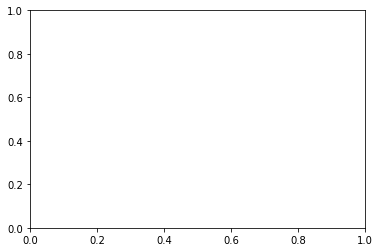

In [11]:
rate = np.zeros(len(treward))#success rate
for i in range(len(treward)):
    if i > 9:
        rate[i] = sum([int(i>0) for i in treward[i-10:i]])/10

x = np.arange(500)
plt.figure()
plt.plot(x, rate)
plt.show()

In [8]:
import pickle
pickle.dump(RL.dataset,open("temp/tdataset_f9_DQN_4_29.pickle","wb"))
pickle.dump(treward,open("temp/reward_f9_DQN_4_29","wb"))

In [6]:
RL.model = keras.models.load_model("temp/DQN_f9_4_29.h5")

In [7]:
#test

env = EnvGridWorld()#(aim = None)

current = 0
count = 0
learns = 0
episode = 0
succ = 0
learn = 0
treward1 = []
rc = 0

Waiting for connection: 


In [8]:
s = env.reset()

while True:   
    action = RL.choose_action(s,test = True)
    s_,r,done,info = env.step(action)
    print ("Total steps:",str(count),"reward:",str(int(r)),"action:",action,"pos:",np.array(s_[0:3]).astype("int"), "Done:", str(succ), "Episode: "+str(episode))
    
    count += 1
    current += 1
    if info == "success":
        succ += 1
        current = 0
    if current>100:
        done = True
        info = "out of steps"
        
    rc += r
    
    if done:
        current = 0
        episode += 1
        RL.model.save("temp/temp.h5")
        treward1.append(rc)
        print ("reset due to",info,"Episode reward:",rc)
        print ("--------------------------------reset---------------------------")
        rc = 0
        if episode >= 10:
            break
        env.reset()
        
 

        
    s = s_

Total steps: 0 reward: -1 action: 6 pos: [ 0  0 -7] Done: 0 Episode: 0
Total steps: 1 reward: 0 action: 2 pos: [  0   1 -10] Done: 0 Episode: 0
Total steps: 2 reward: 2 action: 2 pos: [  0   6 -10] Done: 0 Episode: 0
Total steps: 3 reward: 2 action: 2 pos: [  0  10 -10] Done: 0 Episode: 0
Total steps: 4 reward: 1 action: 2 pos: [  0  15 -10] Done: 0 Episode: 0
Total steps: 5 reward: 1 action: 2 pos: [  0  20 -10] Done: 0 Episode: 0
Total steps: 6 reward: 0 action: 2 pos: [  0  24 -10] Done: 0 Episode: 0
Total steps: 7 reward: 1 action: 1 pos: [  1  27 -11] Done: 0 Episode: 0
Total steps: 8 reward: 2 action: 2 pos: [  5  29 -11] Done: 0 Episode: 0
Total steps: 9 reward: 1 action: 1 pos: [  6  32 -11] Done: 0 Episode: 0
Total steps: 10 reward: 3 action: 1 pos: [ 11  32 -11] Done: 0 Episode: 0
Total steps: 11 reward: 3 action: 1 pos: [ 16  32 -11] Done: 0 Episode: 0
Total steps: 12 reward: 2 action: 1 pos: [ 21  32 -11] Done: 0 Episode: 0
Total steps: 13 reward: 1 action: 2 pos: [ 23  34 

KeyboardInterrupt: 